In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from getpass import getpass

# Prompt for token securely
token = getpass('Enter your GitHub personal access token: ')

# Clone using token authentication
!git clone https://{token}@github.com/pabasara-samarakoon-4176/MDT_prediction.git

Enter your GitHub personal access token: ··········
fatal: destination path 'MDT_prediction' already exists and is not an empty directory.


In [3]:
!ls /content/MDT_prediction/

'Building Density'
 building_density.ipynb
'forest coverage'
 Forest_Coverage.py
 fyp_model.ipynb
 fyp_model_v2.ipynb
 fyp_model_v3.ipynb
 fyp_model_v4.ipynb
 fyp_model_v5.ipynb
 fyp_model_v6_kaggle.ipynb
 fyp_model_v7.ipynb
 fyp_model_v8.ipynb
 geohash_8_kandy.ipynb
 mdt_with_terrain_forest_road_building_population.csv
 README.md
'Road Density'
 synthetic_generation_full.ipynb
 synthetic_generation_inverted.ipynb
'Terrain features'
 validation.ipynb
 vegetation_coverage.ipynb
 Visualization


In [4]:
!cp /content/drive/MyDrive/Colab\ Notebooks/synthetic_generation_inverted.ipynb /content/MDT_prediction/

In [5]:
!git config --global user.email "pabasarasamarakoon2000@gmail.com"
!git config --global user.name "pabasara-samarakoon-4176"

In [6]:
!cd /content/MDT_prediction && git add . && git commit -m "Increased the number of sites" && git push

[main 2a79368] Increased the number of sites
 1 file changed, 1 insertion(+), 1 deletion(-)
remote: Permission to pabasara-samarakoon-4176/MDT_prediction.git denied to pabasara-samarakoon-4176.
fatal: unable to access 'https://github.com/pabasara-samarakoon-4176/MDT_prediction.git/': The requested URL returned error: 403


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
filename = '/content/drive/MyDrive/Final_year_project/datasets/synthetic_v3.csv'
df = pd.read_csv(filename)
df.head()

,Cell_ID,RSRP,RSRQ,EARFCN_DL,Latitude_of_MDT,Longitude_of_MDT,Antenna Height,Azimuth,Tilt,Latitude_of_Site,Longitude_of_Site,Geometry,Geohash,building_count,total_road_length,elevation,slope,NDVI
0,CELL_1000,-114.624395,-10.618715,3750,5.979031,79.996395,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99639502845126 5.979030736102928),tc0fh27,0,0,0.0,0.0,0.860014
1,CELL_1000,-99.606300,-10.830562,3750,5.979569,79.997740,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99774041931212 5.97956903498132),tc0fh2s,0,0,0.0,0.0,0.860014
2,CELL_1000,-94.655705,-7.589006,3750,5.977997,79.993567,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99356655485387 5.977996665827369),tc0fh23,0,0,0.0,0.0,0.050004
3,CELL_1000,-92.516832,-11.616132,3750,5.977406,79.997332,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99733201545884 5.977406255267217),tc0fh2h,0,0,0.0,0.0,0.920012
4,CELL_1000,-82.716518,-7.374246,3750,5.978395,79.997316,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99731644022849 5.9783949725457095),tc0fh2k,0,0,0.0,0.0,0.920012


In [ ]:
df.shape

(226351, 18)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def classify_urbanness(df):
    urb_features = ['building_count', 'total_road_length', 'elevation', 'slope', 'NDVI']

    scaler = MinMaxScaler()
    norm_features = scaler.fit_transform(df[urb_features])
    norm_df = pd.DataFrame(norm_features, columns=urb_features)

    weights = {
        'building_count': 0.3,
        'total_road_length': 0.25,
        'elevation': -0.15,
        'slope': -0.15,
        'NDVI': -0.15
    }

    urban_score = (
        weights['building_count'] * norm_df['building_count'] +
        weights['total_road_length'] * norm_df['total_road_length'] +
        weights['elevation'] * norm_df['elevation'] +
        weights['slope'] * norm_df['slope'] +
        weights['NDVI'] * norm_df['NDVI']
    )

    df['urban_score'] = urban_score
    return df

In [ ]:
df = classify_urbanness(df)
df.head()

,Cell_ID,RSRP,RSRQ,EARFCN_DL,Latitude_of_MDT,Longitude_of_MDT,Antenna Height,Azimuth,Tilt,Latitude_of_Site,Longitude_of_Site,Geometry,Geohash,building_count,total_road_length,elevation,slope,NDVI,urban_score
0,CELL_1000,-114.624395,-10.618715,3750,5.979031,79.996395,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99639502845126 5.979030736102928),tc0fh27,0,0,0.0,0.0,0.860014,-0.129155
1,CELL_1000,-99.606300,-10.830562,3750,5.979569,79.997740,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99774041931212 5.97956903498132),tc0fh2s,0,0,0.0,0.0,0.860014,-0.129155
2,CELL_1000,-94.655705,-7.589006,3750,5.977997,79.993567,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99356655485387 5.977996665827369),tc0fh23,0,0,0.0,0.0,0.050004,-0.007653
3,CELL_1000,-92.516832,-11.616132,3750,5.977406,79.997332,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99733201545884 5.977406255267217),tc0fh2h,0,0,0.0,0.0,0.920012,-0.138155
4,CELL_1000,-82.716518,-7.374246,3750,5.978395,79.997316,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99731644022849 5.9783949725457095),tc0fh2k,0,0,0.0,0.0,0.920012,-0.138155


In [ ]:
df.columns

Index(['Cell_ID', 'RSRP', 'RSRQ', 'EARFCN_DL', 'Latitude_of_MDT',
       'Longitude_of_MDT', 'Antenna Height', 'Azimuth', 'Tilt',
       'Latitude_of_Site', 'Longitude_of_Site', 'Geometry', 'Geohash',
       'building_count', 'total_road_length', 'elevation', 'slope', 'NDVI',
       'urban_score'],
      dtype='object')

In [ ]:
import numpy as np

def simulate_rsrp_rsrq(df):
    noise_rsrp = np.random.normal(0, 3, size=len(df))
    noise_rsrq = np.random.normal(0, 1, size=len(df))

    df['RSRP'] = -80 - (df['urban_score'] * 30) + noise_rsrp
    df['RSRQ'] = -7 - (df['urban_score'] * 6) + noise_rsrq

    return df

In [ ]:
df = simulate_rsrp_rsrq(df)
df.head()

,Cell_ID,RSRP,RSRQ,EARFCN_DL,Latitude_of_MDT,Longitude_of_MDT,Antenna Height,Azimuth,Tilt,Latitude_of_Site,Longitude_of_Site,Geometry,Geohash,building_count,total_road_length,elevation,slope,NDVI,urban_score
0,CELL_1000,-74.920780,-5.804427,3750,5.979031,79.996395,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99639502845126 5.979030736102928),tc0fh27,0,0,0.0,0.0,0.860014,-0.129155
1,CELL_1000,-77.855886,-6.054073,3750,5.979569,79.997740,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99774041931212 5.97956903498132),tc0fh2s,0,0,0.0,0.0,0.860014,-0.129155
2,CELL_1000,-78.119166,-6.438662,3750,5.977997,79.993567,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99356655485387 5.977996665827369),tc0fh23,0,0,0.0,0.0,0.050004,-0.007653
3,CELL_1000,-78.579471,-7.533002,3750,5.977406,79.997332,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99733201545884 5.977406255267217),tc0fh2h,0,0,0.0,0.0,0.920012,-0.138155
4,CELL_1000,-75.098101,-3.836613,3750,5.978395,79.997316,44.484713,189.846087,7.273446,5.978958,79.996402,POINT (79.99731644022849 5.9783949725457095),tc0fh2k,0,0,0.0,0.0,0.920012,-0.138155


In [ ]:
!pip install geohash2

  Preparing metadata (setup.py) ... done
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15543 sha256=7cc1bb431ab24480733b1ca7fc8bdfe1d236e4b3169db8f6034d555478873c42
  Stored in directory: /root/.cache/pip/wheels/f6/7c/c4/1b3c6fea0ebc53bf730dc86bbee7a713d501455dfb4c1f0623
Successfully built geohash2


In [ ]:
import geohash2
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
MIN_LAT, MAX_LAT = 5.85, 10.05
MIN_LON, MAX_LON = 79.65, 81.95

In [ ]:
STEP = 0.0014

In [ ]:
shapefile_path = "/content/drive/MyDrive/Final_year_project/boundary/countries/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

In [ ]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [ ]:
sri_lanka = world[world["ADMIN"] == "Sri Lanka"].geometry.values[0]

In [ ]:
geohash_set = set()
lat_range = np.arange(MIN_LAT, MAX_LAT, STEP)
lon_range = np.arange(MIN_LON, MAX_LON, STEP)

In [ ]:
for lat in lat_range:
    for lon in lon_range:
        point = Point(lon, lat)
        if sri_lanka.contains(point):
            ghash = geohash2.encode(lat, lon, precision=7)
            geohash_set.add(ghash)

print(f"Generated {len(geohash_set)} geohashes covering Sri Lanka.")

Generated 2733546 geohashes covering Sri Lanka.


In [ ]:
df_sl = pd.DataFrame(sorted(geohash_set), columns=["geohash"])
df_sl.head()

,geohash
0,tc0gzcp
1,tc0gzcr
2,tc0gzcy
3,tc0gzcz
4,tc0gzfm


In [ ]:
df_sl.shape

(2733546, 1)

In [ ]:
df_sl = df_sl.rename(columns={'geohash': 'Geohash'})
df_sl.head()

,Geohash
0,tc0gzcp
1,tc0gzcr
2,tc0gzcy
3,tc0gzcz
4,tc0gzfm


In [ ]:
# building data

In [ ]:
building_data_file = "/content/drive/MyDrive/Final_year_project/building/gis_osm_buildings_a_free_1.shp"
building_data = gpd.read_file(building_data_file)
building_data = building_data.to_crs("EPSG:4326")
building_data["Centroid"] = building_data.geometry.centroid

In [ ]:
centroids_geo = gpd.GeoSeries(building_data["Centroid"], crs="EPSG:4326")
centroids_geo.head()

,Centroid
0,POINT (80.21432 6.03336)
1,POINT (80.21844 6.02815)
2,POINT (80.21981 6.03597)
3,POINT (80.21877 6.03423)
4,POINT (80.21924 6.03443)


In [ ]:
from tqdm import tqdm

tqdm.pandas()
building_data['Geohash'] = centroids_geo.progress_apply(lambda pt: geohash2.encode(pt.y, pt.x, precision=7))

100%|██████████| 3250476/3250476 [01:38<00:00, 32974.28it/s]


In [ ]:
building_data.head()

,osm_id,code,fclass,name,type,geometry,Centroid,Geohash
0,28239753,1500,building,None,train_station,"POLYGON ((80.21415 6.03355, 80.21423 6.03356, ...",POINT (80.21432 6.03336),tc14366
1,28239945,1500,building,Dutch Warehouse (National Maritime Museum),None,"POLYGON ((80.21781 6.02812, 80.21844 6.02825, ...",POINT (80.21844 6.02815),tc1433m
2,28294924,1500,building,Green Market,None,"POLYGON ((80.21971 6.03614, 80.21979 6.03617, ...",POINT (80.21981 6.03597),tc1436y
3,28294930,1500,building,Fruit and Flower Market,None,"POLYGON ((80.21861 6.03413, 80.21888 6.03438, ...",POINT (80.21877 6.03423),tc1436m
4,28294932,1500,building,Fish Market,None,"POLYGON ((80.21907 6.03433, 80.21937 6.03458, ...",POINT (80.21924 6.03443),tc1436t


In [ ]:
building_geohashes = set(building_data['Geohash'])
sl_geohashes = set(df_sl['Geohash'])

common_geohashes = building_geohashes.intersection(sl_geohashes)
print(f"Number of common geohashes: {len(common_geohashes)}")

Number of common geohashes: 416291


In [ ]:
building_counts = building_data.groupby('Geohash').size().reset_index(name='building_count')
df = pd.merge(df_sl, building_counts, on='Geohash', how='left')
df['building_count'] = df['building_count'].fillna(0)
df.head()

,Geohash,building_count
0,tc0gzcp,0.0
1,tc0gzcr,0.0
2,tc0gzcy,0.0
3,tc0gzcz,0.0
4,tc0gzfm,0.0


In [ ]:
zero_building_counts = (df['building_count'] == 0).sum()
print(f"Number of 0s in building_count: {zero_building_counts}")

Number of 0s in building_count: 2317255


In [ ]:
# road coverage

In [ ]:
road_data_file = '/content/drive/MyDrive/Final_year_project/roads/gis_osm_roads_free_1.shp'
road_data = gpd.read_file(road_data_file)
road_data = road_data.set_crs("EPSG:4326", allow_override=True)
road_data = road_data.to_crs("EPSG:5234")

In [ ]:
road_data['length_m'] = road_data.geometry.length
road_data.head()

,geometry,length_m
0,"LINESTRING (175105.541 83292.536, 175111.137 8...",155.359485
1,"LINESTRING (137733.104 94693.392, 137750.459 9...",448.233845
2,"LINESTRING (138726.931 93921.301, 138664.881 9...",450.326193
3,"LINESTRING (138638.826 93868.278, 138583.312 9...",145.357689
4,"LINESTRING (139041.49 94363.907, 139035.443 94...",1528.779705


In [ ]:
road_data['centroid'] = road_data.geometry.centroid
road_data.head()

,geometry,length_m,centroid
0,"LINESTRING (175105.541 83292.536, 175111.137 8...",155.359485,POINT (175148.21 83242.506)
1,"LINESTRING (137733.104 94693.392, 137750.459 9...",448.233845,POINT (137937.883 94745.445)
2,"LINESTRING (138726.931 93921.301, 138664.881 9...",450.326193,POINT (138704.835 93774.971)
3,"LINESTRING (138638.826 93868.278, 138583.312 9...",145.357689,POINT (138597.062 93827.954)
4,"LINESTRING (139041.49 94363.907, 139035.443 94...",1528.779705,POINT (138702.701 95040.168)


In [ ]:
centroids_geo = gpd.GeoSeries(road_data["centroid"], crs="EPSG:5234").to_crs("EPSG:4326")
road_data["Geohash"] = centroids_geo.apply(lambda pt: geohash2.encode(pt.y, pt.x, precision=7))
road_data.head()

,geometry,length_m,centroid,Geohash
0,"LINESTRING (175105.541 83292.536, 175111.137 8...",155.359485,POINT (175148.21 83242.506),tc13bfn
1,"LINESTRING (137733.104 94693.392, 137750.459 9...",448.233845,POINT (137937.883 94745.445),tc143m1
2,"LINESTRING (138726.931 93921.301, 138664.881 9...",450.326193,POINT (138704.835 93774.971),tc1437w
3,"LINESTRING (138638.826 93868.278, 138583.312 9...",145.357689,POINT (138597.062 93827.954),tc1437t
4,"LINESTRING (139041.49 94363.907, 139035.443 94...",1528.779705,POINT (138702.701 95040.168),tc143mw


In [ ]:
road_grouped = road_data.groupby("Geohash").agg(
    total_road_length=("length_m", "sum")
).reset_index()
road_grouped.head()

,Geohash,total_road_length
0,tc0fxfr,337.451839
1,tc0fxfs,98.927095
2,tc0fxft,76.730076
3,tc0fxfw,112.560532
4,tc0fxfz,118.543852


In [ ]:
common_geohashes = len(set(df['Geohash']).intersection(set(road_grouped['Geohash'])))
print(f"Number of common geohashes: {common_geohashes}")

Number of common geohashes: 183383


In [ ]:
df = df.merge(road_grouped, on="Geohash", how="left")
df.head()

,Geohash,building_count,total_road_length
0,tc0gzcp,0.0,NaN
1,tc0gzcr,0.0,NaN
2,tc0gzcy,0.0,120.678611
3,tc0gzcz,0.0,230.630987
4,tc0gzfm,0.0,NaN


In [ ]:
df['total_road_length'] = df['total_road_length'].fillna(0).astype(int)
df.head()

,Geohash,building_count,total_road_length
0,tc0gzcp,0.0,0
1,tc0gzcr,0.0,0
2,tc0gzcy,0.0,120
3,tc0gzcz,0.0,230
4,tc0gzfm,0.0,0


In [ ]:
nan_counts = df[['building_count', 'total_road_length']].isna().sum()
print(f"NaN values in 'building_count': {nan_counts['building_count']}")
print(f"NaN values in 'total_road_length': {nan_counts['total_road_length']}")

NaN values in 'building_count': 0
NaN values in 'total_road_length': 0


In [ ]:
df.shape

(2733546, 3)

In [ ]:
df.columns

Index(['Geohash', 'building_count', 'total_road_length'], dtype='object')

In [ ]:
# Elevation and Slope

In [ ]:
elevation_raster_file = '/content/drive/MyDrive/Final_year_project/terrain/elevation.tif'
slope_raster_file = '/content/drive/MyDrive/Final_year_project/terrain/slope.tif'

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 84.8 MB/s eta 0:00:00


In [ ]:
def geohash_to_latlon_center(gh):
    lat, lon, _, _ = geohash2.decode_exactly(gh)
    return lat, lon

In [ ]:
df['lat'], df['lon'] = zip(*df['Geohash'].map(geohash_to_latlon_center))

KeyboardInterrupt: 

In [ ]:
def get_raster_value(raster, lon, lat):
    try:
        coords = [(lon, lat)]
        for val in raster.sample(coords):
            return val[0] if val[0] != raster.nodata else np.nan
    except:
        return np.nan

In [ ]:
with rasterio.open(elevation_raster_file) as elev_src, \
     rasterio.open(slope_raster_file) as slope_src:

    df['Elevation'] = df.progress_apply(lambda row: get_raster_value(elev_src, row['lon'], row['lat']), axis=1)
    df['Slope'] = df.progress_apply(lambda row: get_raster_value(slope_src, row['lon'], row['lat']), axis=1)

In [ ]:
df.head()

,Geohash,building_count,total_road_length,lat,lon,Elevation,Slope
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001099,0.0
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364311,0.0
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0


In [ ]:
nan_counts = df[['Elevation', 'Slope']].isna().sum()
print(f"NaN values in 'Elevation': {nan_counts['Elevation']}")
print(f"NaN values in 'Slope': {nan_counts['Slope']}")

NaN values in 'Elevation': 0
NaN values in 'Slope': 0


In [ ]:
df.to_csv('/content/drive/MyDrive/Final_year_project/datasets/synthetic_v4.csv', index=False)

In [ ]:
filename = "/content/drive/MyDrive/Final_year_project/datasets/synthetic_v4.csv"
df = pd.read_csv(filename)
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.columns

Index(['Geohash', 'building_count', 'total_road_length', 'lat', 'lon',
       'Elevation', 'Slope'],
      dtype='object')

In [ ]:
# NDVI

In [ ]:
ndvi_west = "/content/drive/MyDrive/Final_year_project/vegetation/ndvi_west.tiff"
ndvi_east = "/content/drive/MyDrive/Final_year_project/vegetation/ndvi_east.tiff"

ndvi_files = [ndvi_west, ndvi_east]

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 51.3 MB/s eta 0:00:00


In [ ]:
import rasterio
from rasterio.transform import rowcol
import numpy as np

df['NDVI'] = np.nan
rasters = []
for file in ndvi_files:
    src = rasterio.open(file)
    data = src.read(1).astype(np.float32) / 65535.0
    rasters.append((src, data))

In [ ]:
def get_ndvi(lat, lon):
    for src, ndvi_data in rasters:
        try:
            row, col = rowcol(src.transform, lon, lat)
            if (0 <= row < ndvi_data.shape[0]) and (0 <= col < ndvi_data.shape[1]):
                return float(ndvi_data[row, col])
        except:
            continue
    return np.nan

In [ ]:
from tqdm import tqdm

tqdm.pandas()
df["NDVI"] = df.progress_apply(lambda row: get_ndvi(row["lat"], row["lon"]), axis=1)

100%|██████████| 2733546/2733546 [03:49<00:00, 11914.60it/s]


In [ ]:
df = df.rename(columns={'Elevation': 'elevation', 'Slope': 'slope'})
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000


In [ ]:
df.to_csv('/content/drive/MyDrive/Final_year_project/datasets/synthetic_v4_temp1.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

filename = "/content/drive/MyDrive/Final_year_project/datasets/synthetic_v4_temp1.csv"
df = pd.read_csv(filename)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000


In [ ]:
df.shape

(2733546, 8)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Final_year_project/datasets/synthetic_v6_scale_fixed.csv')
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,Cell_66,6.423076,80.11789,525,653.233337,-10000.0,-10000.0,24.427576,158.003838,9.028885
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885


In [ ]:
df.shape

(2733546, 18)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def urbanness(df):
    urb_features = ['building_count', 'total_road_length', 'elevation', 'slope', 'NDVI']

    scaler = MinMaxScaler()
    norm_features = scaler.fit_transform(df[urb_features])
    norm_df = pd.DataFrame(norm_features, columns=urb_features)

    weights = {
        'building_count': 0.3,
        'total_road_length': 0.25,
        'elevation': -0.15,
        'slope': -0.15,
        'NDVI': -0.15
    }

    urban_score = (
        weights['building_count'] * norm_df['building_count'] +
        weights['total_road_length'] * norm_df['total_road_length'] +
        weights['elevation'] * norm_df['elevation'] +
        weights['slope'] * norm_df['slope'] +
        weights['NDVI'] * norm_df['NDVI']
    )

    df['urban_score'] = urban_score
    return df

In [ ]:
df = urbanness(df)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt,urban_score
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,Cell_66,6.423076,80.11789,525,653.233337,-10000.0,-10000.0,24.427576,158.003838,9.028885,-0.143810
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885,-0.003486
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885,-0.001671
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885,0.000247
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885,-0.003692


In [ ]:
# synthetic cells
import numpy as np

num_cells = 200

LAT_MIN, LAT_MAX = 5.9, 9.9
LON_MIN, LON_MAX = 79.5, 82.1

earfcn_choices = [1650, 525, 3750]

cell_df = pd.DataFrame({
    'Cell_ID': [f'Cell_{i}' for i in range(num_cells)],
    # 'Site_latitude': np.random.uniform(LAT_MIN, LAT_MAX, num_cells),
    # 'Site_longitude': np.random.uniform(LON_MIN, LON_MAX, num_cells),
    # 'EARFCN_DL': np.random.choice(earfcn_choices, size=num_cells),
    'antenna_height': np.random.uniform(20, 50, num_cells),
    'azimuth': np.random.uniform(0, 360, num_cells),
    'tilt': np.random.uniform(0, 15, num_cells)
})

In [ ]:
cell_df.head()

,Cell_ID,antenna_height,azimuth,tilt
0,Cell_0,43.743051,46.939348,0.495244
1,Cell_1,34.331862,132.312127,10.364853
2,Cell_2,30.863428,237.095119,10.842286
3,Cell_3,25.276823,26.573327,11.727826
4,Cell_4,30.381144,322.484254,6.923092


In [ ]:
cell_df.shape

(200, 4)

In [ ]:
filename = "/content/drive/MyDrive/Final_year_project/datasets/synthetic_v5.csv"
df = pd.read_csv(filename)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,Cell_66,6.423076,80.11789,525,653.233337,0.0,0.0
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0


In [ ]:
df = pd.merge(df, cell_df, on='Cell_ID', how='left')
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,Cell_66,6.423076,80.11789,525,653.233337,0.0,0.0,24.427576,158.003838,9.028885
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885


In [ ]:
df.to_csv('/content/drive/MyDrive/Final_year_project/datasets/synthetic_v6.csv', index=False)

In [ ]:
!pip install haversine

In [ ]:
from haversine import haversine, Unit

def assign_nearest_cell(row, cell_df):
    geo_point = (row['lat'], row['lon'])
    distances = cell_df.apply(lambda cell: haversine(geo_point, (cell['Site_latitude'], cell['Site_longitude'])), axis=1)
    nearest_idx = distances.idxmin()
    return cell_df.loc[nearest_idx, 'Cell_ID']

In [ ]:
df_1 = df.iloc[:100000]
df_1.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,urban_score
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,-0.143810
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,-0.003486
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,-0.001671
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,0.000247
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,-0.003692


In [ ]:
from tqdm import tqdm

tqdm.pandas()
df_1['Cell_ID'] = df_1.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)
df_1.head()

100%|██████████| 100000/100000 [04:47<00:00, 348.34it/s]
/tmp/ipython-input-3968584337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Cell_ID'] = df_1.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,urban_score,Cell_ID
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,-0.143810,Cell_66
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,-0.003486,Cell_66
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,-0.001671,Cell_66
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,0.000247,Cell_66
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,-0.003692,Cell_66


In [ ]:
df_1 = pd.merge(df_1, cell_df, on='Cell_ID', how='left')
df_1.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,urban_score,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,-0.143810,Cell_66,6.423076,80.11789,525
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,-0.003486,Cell_66,6.423076,80.11789,525
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,-0.001671,Cell_66,6.423076,80.11789,525
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,0.000247,Cell_66,6.423076,80.11789,525
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,-0.003692,Cell_66,6.423076,80.11789,525


In [ ]:
df_1.to_csv('/content/drive/MyDrive/Final_year_project/datasets/chunking/synthetic_v5_0_100k.csv', index=False)

In [ ]:
chunk_size = 100000
list_of_dfs = [df.iloc[i:i+chunk_size] for i in range(0, df.shape[0], chunk_size)]

In [ ]:
for i, chunk in enumerate(list_of_dfs):
    print(f"Chunk {i+1} shape: {chunk.shape}")
    chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)
    chunk = pd.merge(chunk, cell_df, on='Cell_ID', how='left')
    chunk.to_csv(f'/content/drive/MyDrive/Final_year_project/datasets/chunking/synthetic_v5_{i+1}_{i+1+chunk_size}.csv', index=False)

Chunk 1 shape: (100000, 9)


100%|██████████| 100000/100000 [04:27<00:00, 374.45it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 2 shape: (100000, 9)


100%|██████████| 100000/100000 [04:19<00:00, 385.12it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 3 shape: (100000, 9)


100%|██████████| 100000/100000 [04:18<00:00, 386.98it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 4 shape: (100000, 9)


100%|██████████| 100000/100000 [04:20<00:00, 383.75it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 5 shape: (100000, 9)


100%|██████████| 100000/100000 [04:16<00:00, 390.43it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 6 shape: (100000, 9)


100%|██████████| 100000/100000 [04:18<00:00, 386.84it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 7 shape: (100000, 9)


100%|██████████| 100000/100000 [04:17<00:00, 389.04it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 8 shape: (100000, 9)


100%|██████████| 100000/100000 [04:17<00:00, 388.98it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 9 shape: (100000, 9)


100%|██████████| 100000/100000 [04:18<00:00, 386.70it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 10 shape: (100000, 9)


100%|██████████| 100000/100000 [04:18<00:00, 386.68it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 11 shape: (100000, 9)


100%|██████████| 100000/100000 [04:17<00:00, 388.77it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 12 shape: (100000, 9)


100%|██████████| 100000/100000 [04:16<00:00, 389.67it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 13 shape: (100000, 9)


100%|██████████| 100000/100000 [04:16<00:00, 389.36it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 14 shape: (100000, 9)


100%|██████████| 100000/100000 [04:17<00:00, 388.96it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 15 shape: (100000, 9)


100%|██████████| 100000/100000 [04:17<00:00, 387.96it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 16 shape: (100000, 9)


100%|██████████| 100000/100000 [04:17<00:00, 387.79it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 17 shape: (100000, 9)


100%|██████████| 100000/100000 [04:16<00:00, 389.86it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 18 shape: (100000, 9)


100%|██████████| 100000/100000 [04:17<00:00, 388.05it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 19 shape: (100000, 9)


100%|██████████| 100000/100000 [04:16<00:00, 390.60it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 20 shape: (100000, 9)


100%|██████████| 100000/100000 [04:16<00:00, 390.28it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 21 shape: (100000, 9)


100%|██████████| 100000/100000 [04:16<00:00, 390.53it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 22 shape: (100000, 9)


100%|██████████| 100000/100000 [04:15<00:00, 391.68it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 23 shape: (100000, 9)


100%|██████████| 100000/100000 [04:16<00:00, 390.13it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 24 shape: (100000, 9)


100%|██████████| 100000/100000 [04:17<00:00, 387.84it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 25 shape: (100000, 9)


100%|██████████| 100000/100000 [04:16<00:00, 390.05it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 26 shape: (100000, 9)


100%|██████████| 100000/100000 [04:17<00:00, 388.77it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 27 shape: (100000, 9)


100%|██████████| 100000/100000 [04:16<00:00, 389.57it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


Chunk 28 shape: (33546, 9)


100%|██████████| 33546/33546 [01:25<00:00, 392.21it/s]
/tmp/ipython-input-1657439029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Cell_ID'] = chunk.progress_apply(lambda row: assign_nearest_cell(row, cell_df), axis=1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import glob

path = r'/content/drive/MyDrive/Final_year_project/datasets/chunking'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,urban_score,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,-0.143810,Cell_66,6.423076,80.11789,525
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,-0.003486,Cell_66,6.423076,80.11789,525
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,-0.001671,Cell_66,6.423076,80.11789,525
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,0.000247,Cell_66,6.423076,80.11789,525
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,-0.003692,Cell_66,6.423076,80.11789,525


In [ ]:
df.shape

(2733546, 13)

In [ ]:
# population

In [ ]:
pop_filename = "/content/drive/MyDrive/Final_year_project/population/population_density.csv"
df_pop = pd.read_csv(pop_filename)
df_pop.head()

,X,Y,Z
0,80.202916,9.837083,1672.963867
1,80.211250,9.837083,1452.352417
2,80.219583,9.837083,1014.411499
3,80.136250,9.828750,1161.758057
4,80.144583,9.828750,819.797974


In [ ]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326").to_crs("EPSG:5234")
gdf.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,urban_score,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,geometry
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,-0.143810,Cell_66,6.423076,80.11789,525,POINT (131603.908 121478.734)
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,-0.003486,Cell_66,6.423076,80.11789,525,POINT (131604.087 121630.598)
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,-0.001671,Cell_66,6.423076,80.11789,525,POINT (131452.491 121934.505)
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,0.000247,Cell_66,6.423076,80.11789,525,POINT (131604.445 121934.325)
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,-0.003692,Cell_66,6.423076,80.11789,525,POINT (131300.898 122238.412)


In [ ]:
import numpy as np

points = np.array(list(zip(gdf.geometry.x, gdf.geometry.y)))

In [ ]:
gdf_pop = gpd.GeoDataFrame(df_pop, geometry=gpd.points_from_xy(df_pop.X, df_pop.Y), crs="EPSG:4326").to_crs("EPSG:5234")
gdf_pop.head()

,X,Y,Z,geometry
0,80.202916,9.837083,1672.963867,POINT (137389.623 513711.102)
1,80.211250,9.837083,1452.352417,POINT (138303.695 513709.563)
2,80.219583,9.837083,1014.411499,POINT (139217.766 513708.046)
3,80.136250,9.828750,1161.758057,POINT (130075.252 512802.539)
4,80.144583,9.828750,819.797974,POINT (130989.358 512800.82)


In [ ]:
pop_points = np.array(list(zip(gdf_pop.geometry.x, gdf_pop.geometry.y)))

In [ ]:
from scipy.spatial import cKDTree

population_tree = cKDTree(pop_points)
distances, indices = population_tree.query(points, distance_upper_bound=1000)

In [ ]:
from tqdm import tqdm

tqdm.pandas()
df['population_density'] = [gdf_pop.iloc[i]['Z'] if i < len(gdf_pop) else 0 for i in tqdm(indices)]
df.head()

100%|██████████| 2733546/2733546 [02:13<00:00, 20540.34it/s]


,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,urban_score,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,-0.143810,Cell_66,6.423076,80.11789,525,653.233337
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,-0.003486,Cell_66,6.423076,80.11789,525,618.614746
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,-0.001671,Cell_66,6.423076,80.11789,525,618.614746
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,0.000247,Cell_66,6.423076,80.11789,525,618.614746
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,-0.003692,Cell_66,6.423076,80.11789,525,618.614746


In [ ]:
df.to_csv(f"/content/drive/MyDrive/Final_year_project/datasets/synthetic_v4_temp2.csv", index=False)

In [ ]:
unique_cell_ids = df['Cell_ID'].nunique()
print(f"Number of unique Cell_IDs: {unique_cell_ids}")

Number of unique Cell_IDs: 121


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def urbanness(df):
    urb_features = [
        'building_count',
        'total_road_length',
        'elevation',
        'slope',
        'NDVI',
        'population_density'
    ]

    # Normalize the features
    scaler = MinMaxScaler()
    norm_features = scaler.fit_transform(df[urb_features])
    norm_df = pd.DataFrame(norm_features, columns=urb_features)

    # Feature weights (must sum to 1 if you want a normalized impact)
    weights = {
        'building_count': 0.25,
        'total_road_length': 0.20,
        'elevation': -0.10,
        'slope': -0.10,
        'NDVI': -0.15,
        'population_density': 0.30
    }

    # Compute the urban score as a weighted sum
    urban_score = sum(
        weights[feat] * norm_df[feat] for feat in urb_features
    )

    df['urban_score'] = urban_score
    return df

In [ ]:
df = urbanness(df)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt,urban_score
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,Cell_66,6.423076,80.11789,525,653.233337,-10000.0,-10000.0,24.427576,158.003838,9.028885,-0.135810
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885,0.003419
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885,0.004729
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885,0.006099
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885,0.003282


In [ ]:
coverage_radius_map = {
    525: 5.0,
    1650: 3.0,
    3750: 1.5
}

In [ ]:
# Setup the range based on EARFCN_DL and attenuate based on urban_score

In [ ]:
from geopy.distance import distance

def compute_rsrp_rsrq(row):
    site_coord = (row['Site_latitude'], row['Site_longitude'])
    cell_coord = (row['lat'], row['lon'])

    d = distance(site_coord, cell_coord).km

    radius = coverage_radius_map.get(int(row['EARFCN_DL']), 3.0)

    # if d > radius:
    #     return pd.Series({'RSRP': 0.0, 'RSRQ': 0.0})

    rsrp = -50 - (30 * (d / radius))
    rsrq = -10 - (10 * (d / radius))

    attenuation_factor = 1 + (row['urban_score'] * 0.5)
    rsrp /= attenuation_factor
    rsrq /= attenuation_factor

    return pd.Series({'RSRP': rsrp, 'RSRQ': rsrq})

In [ ]:
chunk_size = 100000
list_of_dfs = [df.iloc[i:i+chunk_size] for i in range(0, df.shape[0], chunk_size)]

In [ ]:
from tqdm import tqdm

tqdm.pandas()

for i, chunk in enumerate(list_of_dfs):
    print(f"Chunk {i+1} shape: {chunk.shape}")
    chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)
    chunk.to_csv(f'/content/drive/MyDrive/Final_year_project/datasets/chunks/synthetic_v7_{i+1}_{i+1+chunk_size}.csv', index=False)

Chunk 1 shape: (100000, 19)


100%|██████████| 100000/100000 [00:44<00:00, 2258.92it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 2 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2279.53it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 3 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2288.16it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 4 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2274.34it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 5 shape: (100000, 19)


100%|██████████| 100000/100000 [00:44<00:00, 2229.40it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 6 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2296.94it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 7 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2294.33it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 8 shape: (100000, 19)


100%|██████████| 100000/100000 [00:44<00:00, 2258.99it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 9 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2298.87it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 10 shape: (100000, 19)


100%|██████████| 100000/100000 [00:44<00:00, 2239.22it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 11 shape: (100000, 19)


100%|██████████| 100000/100000 [00:45<00:00, 2180.39it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 12 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2302.53it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 13 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2310.30it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 14 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2313.19it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 15 shape: (100000, 19)


100%|██████████| 100000/100000 [00:44<00:00, 2254.78it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 16 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2313.47it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 17 shape: (100000, 19)


100%|██████████| 100000/100000 [00:44<00:00, 2249.34it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 18 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2309.45it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 19 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2320.01it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 20 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2312.09it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 21 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2305.05it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 22 shape: (100000, 19)


100%|██████████| 100000/100000 [00:44<00:00, 2248.40it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 23 shape: (100000, 19)


100%|██████████| 100000/100000 [00:43<00:00, 2314.26it/s]
/tmp/ipython-input-668449287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[['RSRP', 'RSRQ']] = chunk.progress_apply(compute_rsrp_rsrq, axis=1)


Chunk 24 shape: (100000, 19)


100%|█████████▉| 99794/100000 [00:39<00:00, 2959.92it/s]

In [ ]:
import pandas as pd
import glob

path = r'/content/drive/MyDrive/Final_year_project/datasets/chunks'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt,urban_score
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,Cell_66,6.423076,80.11789,525,653.233337,-151.854983,-43.465981,24.427576,158.003838,9.028885,-0.135810
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-140.427032,-40.153720,24.427576,158.003838,9.028885,0.003419
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-138.337565,-39.461580,24.427576,158.003838,9.028885,0.004729
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-138.494392,-39.518399,24.427576,158.003838,9.028885,0.006099
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-136.439994,-38.824252,24.427576,158.003838,9.028885,0.003282


In [ ]:
df.drop('urban_score', axis=1, inplace=True)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,Cell_66,6.423076,80.11789,525,653.233337,-151.854983,-43.465981,24.427576,158.003838,9.028885
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-140.427032,-40.153720,24.427576,158.003838,9.028885
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-138.337565,-39.461580,24.427576,158.003838,9.028885
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-138.494392,-39.518399,24.427576,158.003838,9.028885
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-136.439994,-38.824252,24.427576,158.003838,9.028885


In [ ]:
df.drop('slope', axis=1, inplace=True)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.920012,Cell_66,6.423076,80.11789,525,653.233337,-151.854983,-43.465981,24.427576,158.003838,9.028885
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-140.427032,-40.153720,24.427576,158.003838,9.028885
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-138.337565,-39.461580,24.427576,158.003838,9.028885
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-138.494392,-39.518399,24.427576,158.003838,9.028885
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-136.439994,-38.824252,24.427576,158.003838,9.028885


In [ ]:
df.shape

(2733546, 17)

In [ ]:
df.to_csv('/content/drive/MyDrive/Final_year_project/datasets/synthetic_v7.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

filename = '/content/drive/MyDrive/Final_year_project/datasets/synthetic_v6.csv'
df = pd.read_csv(filename)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,Cell_66,6.423076,80.11789,525,653.233337,0.0,0.0,24.427576,158.003838,9.028885
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885


In [ ]:
df.shape

(2733546, 18)

In [ ]:
print(f"Number of unique values in 'slope': {df['RSRP'].nunique()}")

Number of unique values in 'slope': 139063


In [ ]:
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("\n")

Value counts for column: Geohash
Geohash
tc9s812    1
tc0gzcp    1
tc0gzcr    1
tc0gzcy    1
tc0gzcz    1
          ..
tc0gzfx    1
tc0gzfw    1
tc0gzfv    1
tc0gzfu    1
tc0gzft    1
Name: count, Length: 2733546, dtype: int64


Value counts for column: building_count
building_count
0.0      2317255
1.0        93902
2.0        63120
3.0        46849
4.0        36944
          ...   
129.0          1
148.0          1
150.0          1
110.0          1
122.0          1
Name: count, Length: 137, dtype: int64


Value counts for column: total_road_length
total_road_length
0        2550169
180          361
144          353
147          349
98           347
          ...   
4054           1
3397           1
3522           1
4094           1
13092          1
Name: count, Length: 6303, dtype: int64


Value counts for column: lat
lat
7.523575    1436
7.526321    1435
7.524948    1435
7.512589    1434
7.513962    1434
            ... 
9.818344       6
9.819717       4
5.969009       2
9.822464    

In [ ]:
site_cell_counts = df.groupby(['Site_latitude', 'Site_longitude'])['Cell_ID'].nunique().reset_index(name='number_of_cells')
display(site_cell_counts.head())
print(f"\nTotal number of unique site locations: {site_cell_counts.shape[0]}")

,Site_latitude,Site_longitude,number_of_cells
0,5.913384,80.866141,1
1,6.138418,80.132059,1
2,6.202223,80.471394,1
3,6.282885,81.098547,1
4,6.290753,80.947713,1



Total number of unique site locations: 121


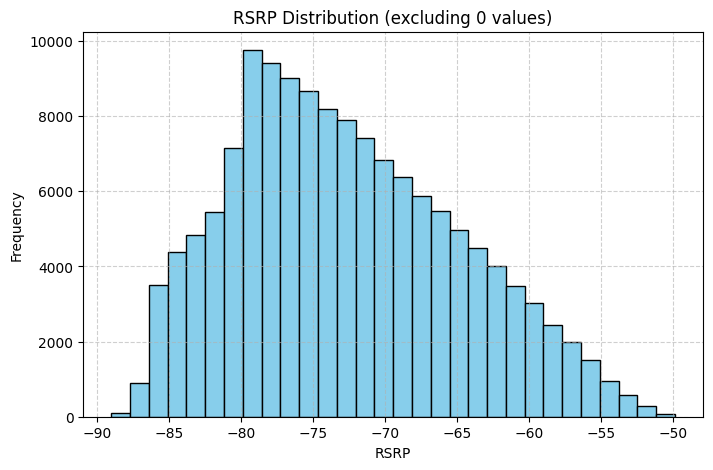

In [ ]:
import matplotlib.pyplot as plt

# Filter out rows where RSRP is 0
df_filtered = df[df['RSRP'] != 0]

plt.figure(figsize=(8, 5))
plt.hist(df_filtered['RSRP'], bins=30, color='skyblue', edgecolor='black')
plt.title('RSRP Distribution (excluding 0 values)')
plt.xlabel('RSRP')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
df_sl = pd.read_csv('/content/drive/MyDrive/Final_year_project/datasets/Sri-Lanka.csv')
df_sl.head()

,Cell_ID,Cell Name,RSRP,RSRQ,Geohash,EARFCN_DL,Latitude_of_MDT,Longitude_of_MDT,MR_Count,Site ID,...,oneway,bridge,layer,source,name:si,name:ta,osm_id,osm_type,Road_Coverage,Population_Density
0,5215253,Mannar_SLT-MA0001-H_2B,-100.0,-13.0,tc8g466m,1650,8.978096,79.906923,2,MA0001,...,NaN,NaN,NaN,NaN,NaN,NaN,156298074.0,ways_line,1,3291.916504
1,5215253,Mannar_SLT-MA0001-H_2B,-100.0,-13.0,tc8g466m,1650,8.978096,79.906923,2,MA0001,...,NaN,NaN,NaN,NaN,NaN,NaN,197793816.0,ways_line,1,3291.916504
2,5215253,Mannar_SLT-MA0001-H_2B,-100.0,-13.0,tc8g466m,1650,8.978096,79.906923,2,MA0001,...,NaN,NaN,NaN,NaN,NaN,NaN,197793916.0,ways_line,1,3291.916504
3,5215253,Mannar_SLT-MA0001-H_2B,-100.0,-13.0,tc8g466m,1650,8.978096,79.906923,2,MA0001,...,NaN,NaN,NaN,NaN,NaN,NaN,197793699.0,ways_line,1,3291.916504
4,5215253,Mannar_SLT-MA0001-H_2B,-100.0,-13.0,tc8g466m,1650,8.978096,79.906923,2,MA0001,...,NaN,NaN,NaN,NaN,NaN,NaN,156298067.0,ways_line,1,3291.916504


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

filename = '/content/drive/MyDrive/Final_year_project/datasets/synthetic_v6.csv'
df = pd.read_csv(filename)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,Cell_66,6.423076,80.11789,525,653.233337,0.0,0.0,24.427576,158.003838,9.028885
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885


In [ ]:
min_rsrp = df['RSRP'].min()
min_rsrq = df['RSRQ'].min()

print(f"Minimum RSRP: {min_rsrp}")
print(f"Minimum RSRQ: {min_rsrq}")

Minimum RSRP: -88.98858066708405
Minimum RSRQ: -22.239079802394546


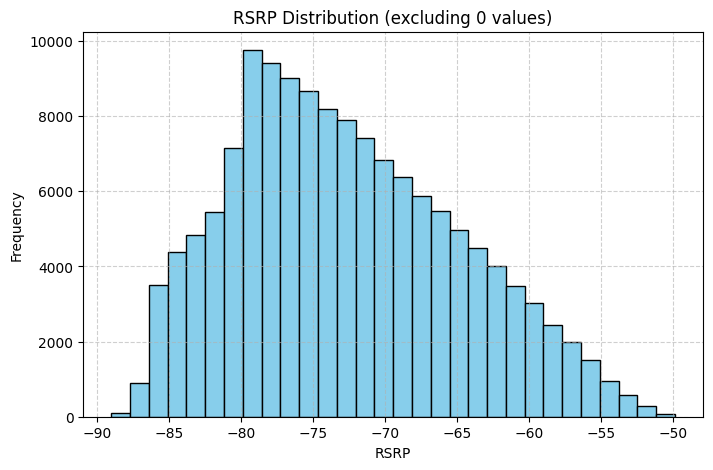

In [ ]:
import matplotlib.pyplot as plt

# Filter out rows where RSRP is 0
df_filtered = df[df['RSRP'] != 0]

plt.figure(figsize=(8, 5))
plt.hist(df_filtered['RSRP'], bins=30, color='skyblue', edgecolor='black')
plt.title('RSRP Distribution (excluding 0 values)')
plt.xlabel('RSRP')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
df['RSRP'] = df['RSRP'].replace(-100.0, -10000.0)
df['RSRQ'] = df['RSRQ'].replace(-100.0, -10000.0)

df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,Cell_66,6.423076,80.11789,525,653.233337,-10000.0,-10000.0,24.427576,158.003838,9.028885
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-10000.0,-10000.0,24.427576,158.003838,9.028885


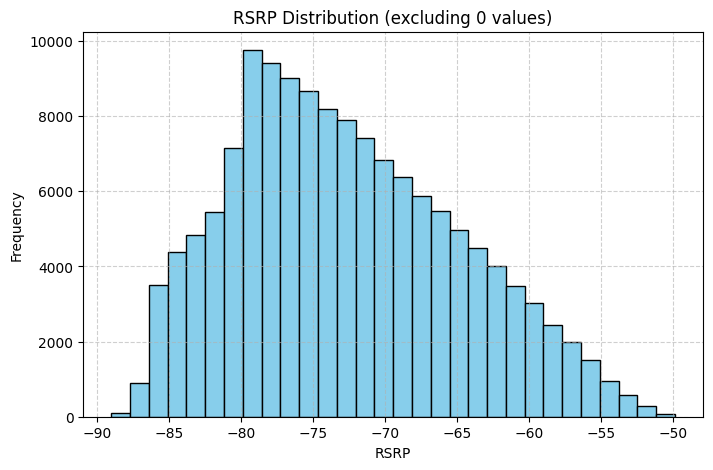

In [ ]:
import matplotlib.pyplot as plt

# Filter out rows where RSRP is 0
df_filtered = df[df['RSRP'] != -10000.0]

plt.figure(figsize=(8, 5))
plt.hist(df_filtered['RSRP'], bins=30, color='skyblue', edgecolor='black')
plt.title('RSRP Distribution (excluding 0 values)')
plt.xlabel('RSRP')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/Final_year_project/datasets/synthetic_v6_scale_fixed.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Final_year_project/datasets/synthetic_v7.csv')
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.920012,Cell_66,6.423076,80.11789,525,653.233337,-151.854983,-43.465981,24.427576,158.003838,9.028885
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-140.427032,-40.153720,24.427576,158.003838,9.028885
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-138.337565,-39.461580,24.427576,158.003838,9.028885
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-138.494392,-39.518399,24.427576,158.003838,9.028885
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-136.439994,-38.824252,24.427576,158.003838,9.028885


In [ ]:
df.shape

(2733546, 17)

In [ ]:
import numpy as np
from geopy.distance import distance

TILT_RANGE = (0, 15)  # degrees
AZIMUTH_RANGE = (0, 360)  # degrees
ANTENNA_HEIGHT_RANGE = (20, 50)  # meters
EARFCN_VALUES = [525, 1650, 3750]

In [ ]:
coverage_radius_map = {
    525: 5.0,    # km
    1650: 3.0,   # km
    3750: 2.0    # km
}

In [ ]:
def assign_random_antenna_configs(df):
    """
    Assign random tilt, azimuth, antenna height, and EARFCN_DL values per row.
    """
    df = df.copy()
    df["tilt"] = np.random.uniform(*TILT_RANGE, size=len(df))
    df["azimuth"] = np.random.uniform(*AZIMUTH_RANGE, size=len(df))
    return df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def urbanness(df):
    urb_features = [
        'building_count',
        'total_road_length',
        'elevation',
        'NDVI',
        'population_density'
    ]

    # Normalize the features
    scaler = MinMaxScaler()
    norm_features = scaler.fit_transform(df[urb_features])
    norm_df = pd.DataFrame(norm_features, columns=urb_features)

    # Feature weights (must sum to 1 if you want a normalized impact)
    weights = {
        'building_count': 0.25,
        'total_road_length': 0.20,
        'elevation': -0.10,
        'NDVI': -0.15,
        'population_density': 0.30
    }

    # Compute the urban score as a weighted sum
    urban_score = sum(
        weights[feat] * norm_df[feat] for feat in urb_features
    )

    df['urban_score'] = urban_score
    return df

In [ ]:
import numpy as np

def compute_rsrp_rsrq_vectorized(df):
    R = 6371.0  # Earth radius km
    lat1 = np.radians(df["Site_latitude"].values)
    lon1 = np.radians(df["Site_longitude"].values)
    lat2 = np.radians(df["lat"].values)
    lon2 = np.radians(df["lon"].values)

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    d = 2 * R * np.arcsin(np.sqrt(a))

    radius_map = {525: 5.0, 1650: 3.0, 3750: 2.0}
    radius = np.array([radius_map[int(e)] for e in df["EARFCN_DL"].values])

    rsrp = -50 - (30 * (d / radius))
    rsrq = -10 - (10 * (d / radius))

    attenuation = 1 + (df["urban_score"].values * 0.5)
    rsrp /= attenuation
    rsrq /= attenuation

    df["RSRP"] = rsrp
    df["RSRQ"] = rsrq
    return df

In [ ]:
df = urbanness(df)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt,urban_score
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.920012,Cell_66,6.423076,80.11789,525,653.233337,-151.854983,-43.465981,24.427576,158.003838,9.028885,-0.135810
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-140.427032,-40.153720,24.427576,158.003838,9.028885,0.003419
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-138.337565,-39.461580,24.427576,158.003838,9.028885,0.004729
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-138.494392,-39.518399,24.427576,158.003838,9.028885,0.006099
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-136.439994,-38.824252,24.427576,158.003838,9.028885,0.003282


In [ ]:
df = assign_random_antenna_configs(df)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt,urban_score
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.920012,Cell_66,6.423076,80.11789,525,653.233337,-151.854983,-43.465981,24.427576,354.653991,1.811060,-0.135810
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-140.427032,-40.153720,24.427576,249.627392,11.913779,0.003419
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-138.337565,-39.461580,24.427576,290.463374,14.077599,0.004729
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-138.494392,-39.518399,24.427576,99.646998,3.022281,0.006099
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.000000,Cell_66,6.423076,80.11789,525,618.614746,-136.439994,-38.824252,24.427576,2.343193,13.284645,0.003282


In [ ]:
df = df.drop(['RSRP', 'RSRQ'], axis=1)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,antenna_height,azimuth,tilt,urban_score
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.920012,Cell_66,6.423076,80.11789,525,653.233337,24.427576,354.653991,1.811060,-0.135810
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,249.627392,11.913779,0.003419
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,290.463374,14.077599,0.004729
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,99.646998,3.022281,0.006099
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,2.343193,13.284645,0.003282


In [ ]:
df = compute_rsrp_rsrq_vectorized(df)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,antenna_height,azimuth,tilt,urban_score,RSRP,RSRQ
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.920012,Cell_66,6.423076,80.11789,525,653.233337,24.427576,354.653991,1.811060,-0.135810,-152.345499,-43.629487
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,249.627392,11.913779,0.003419,-140.878219,-40.304115
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,290.463374,14.077599,0.004729,-138.779796,-39.608990
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,99.646998,3.022281,0.006099,-138.934495,-39.665100
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,2.343193,13.284645,0.003282,-136.873867,-38.968876


In [ ]:
df.shape

(2733546, 18)

In [ ]:
df = df.drop(['urban_score'], axis=1)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,antenna_height,azimuth,tilt,RSRP,RSRQ
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.920012,Cell_66,6.423076,80.11789,525,653.233337,24.427576,354.653991,1.811060,-152.345499,-43.629487
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,249.627392,11.913779,-140.878219,-40.304115
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,290.463374,14.077599,-138.779796,-39.608990
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,99.646998,3.022281,-138.934495,-39.665100
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,2.343193,13.284645,-136.873867,-38.968876


In [ ]:
df.to_csv('/content/drive/MyDrive/Final_year_project/datasets/synthetic_v8.csv', index=False)

In [ ]:
min_rsrp = df['RSRP'].min()
max_rsrp = df['RSRP'].max()

print(f"Minimum RSRP: {min_rsrp}")
print(f"Maximum RSRP: {max_rsrp}")

Minimum RSRP: -651.1917394150954
Maximum RSRP: -49.86681974895308


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Final_year_project/datasets/synthetic_v8.csv')
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,antenna_height,azimuth,tilt,RSRP,RSRQ
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.920012,Cell_66,6.423076,80.11789,525,653.233337,24.427576,354.653991,1.811060,-152.345499,-43.629487
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,249.627392,11.913779,-140.878219,-40.304115
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,290.463374,14.077599,-138.779796,-39.608990
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,99.646998,3.022281,-138.934495,-39.665100
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.000000,Cell_66,6.423076,80.11789,525,618.614746,24.427576,2.343193,13.284645,-136.873867,-38.968876


In [ ]:
from geopy.distance import distance

def max_mdt_distance_per_cell(df):
    """
    Compute the maximum distance of MDT points (lat, lon) from site coordinates per cell.

    Args:
        df (pd.DataFrame): DataFrame containing at least:
                           - 'Cell_ID'
                           - 'Site_latitude'
                           - 'Site_longitude'
                           - 'lat'
                           - 'lon'

    Returns:
        pd.DataFrame: DataFrame with columns ['Cell_ID', 'max_distance_km'].
    """
    results = []

    for cell_id, group in df.groupby("Cell_ID"):
        site_coord = (group["Site_latitude"].iloc[0], group["Site_longitude"].iloc[0])

        # Compute distances of all MDT points to site
        dists = group.apply(lambda row: distance(site_coord, (row["lat"], row["lon"])).km, axis=1)

        max_dist = dists.max()
        results.append({"Cell_ID": cell_id, "max_distance_km": max_dist})

    return pd.DataFrame(results)

In [ ]:
# max_distances = max_mdt_distance_per_cell(df)
# max_distances.head()

In [ ]:
from geopy.distance import distance

# Coverage radius map (in km)
coverage_radius_map = {
    525: 5.0,    # km
    1650: 3.0,   # km
    3750: 2.0    # km
}

def filter_mdt_by_coverage(df, tolerance_km=0.1):
    """
    Keep MDT data only within EARFCN_DL-based coverage radius (± tolerance).

    Args:
        df (pd.DataFrame): Must contain 'Cell_ID', 'EARFCN_DL', 'Site_latitude', 'Site_longitude', 'lat', 'lon'
        tolerance_km (float): Tolerance in km (default 0.1 km = 100m)

    Returns:
        pd.DataFrame: Filtered dataframe with only valid MDT points
    """
    valid_rows = []

    for cell_id, group in df.groupby("Cell_ID"):
        earfcn = int(group["EARFCN_DL"].iloc[0])
        site_coord = (group["Site_latitude"].iloc[0], group["Site_longitude"].iloc[0])

        # Coverage radius for this EARFCN with tolerance
        radius = coverage_radius_map.get(earfcn, 3.0) + tolerance_km

        # Compute distances and filter
        dists = group.apply(lambda row: distance(site_coord, (row["lat"], row["lon"])).km, axis=1)
        mask = dists <= radius
        valid_rows.append(group[mask])

    return pd.concat(valid_rows).reset_index(drop=True)

In [ ]:
df.shape

(2733546, 17)

In [ ]:
df = filter_mdt_by_coverage(df)
df.shape

(154686, 17)

In [ ]:
df.shape

(154686, 17)

In [ ]:
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,antenna_height,azimuth,tilt,RSRP,RSRQ
0,tc3ksmf,0.0,0,7.854538,80.698013,181.43857,0.000000,Cell_0,7.873053,80.701944,3750,172.720276,43.743051,171.470501,13.701957,-81.796375,-20.579287
1,tc3ksmg,0.0,0,7.854538,80.699387,185.41133,0.000000,Cell_0,7.873053,80.701944,3750,114.387108,43.743051,148.982624,6.790237,-81.436094,-20.456846
2,tc3ksmu,0.0,0,7.854538,80.700760,185.48232,0.310002,Cell_0,7.873053,80.701944,3750,114.387108,43.743051,164.015930,5.184934,-83.149257,-20.868145
3,tc3ksmv,0.0,0,7.854538,80.702133,183.33498,0.310002,Cell_0,7.873053,80.701944,3750,114.387108,43.743051,27.223252,6.173411,-83.083667,-20.846583
4,tc3ksmz,0.0,0,7.854538,80.704880,181.32620,0.059998,Cell_0,7.873053,80.701944,3750,114.387108,43.743051,294.136635,10.381829,-81.890423,-20.578507


In [ ]:
max_distances = max_mdt_distance_per_cell(df)
max_distances.head()

,Cell_ID,max_distance_km
0,Cell_0,2.098198
1,Cell_103,2.098826
2,Cell_107,3.098916
3,Cell_111,3.099929
4,Cell_112,5.099217


In [ ]:
!pip install geohash2

  Preparing metadata (setup.py) ... done
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15543 sha256=4aa6c9b7bf710058dc008d204a3eac406daafec9b942d69e298a5637ad1e390a
  Stored in directory: /root/.cache/pip/wheels/00/d5/b6/3fbe4088f7912982f596eaddfd593d16096468a2f13e470ae7
Successfully built geohash2


In [ ]:
import geohash2
import random
import pandas as pd

def randomize_point_in_geohash(geohash_code):
    """
    Randomly generate a point inside the bounding box of a geohash cell.
    """
    lat, lon, lat_err, lon_err = geohash2.decode_exactly(geohash_code)
    # bounding box
    lat_min, lat_max = lat - lat_err, lat + lat_err
    lon_min, lon_max = lon - lon_err, lon + lon_err

    rand_lat = random.uniform(lat_min, lat_max)
    rand_lon = random.uniform(lon_min, lon_max)
    return rand_lat, rand_lon

def randomize_points_and_reencode(df, cell_id, precision_new=8):
    """
    Randomize MDT points inside geohash cell areas, then re-encode at higher precision.

    Args:
        df (pd.DataFrame): Dataframe containing at least ['Cell_ID','lat','lon','Geohash'].
        cell_id (str): Cell to filter (e.g., 'Cell_0').
        precision_new (int): New geohash precision (default=8).

    Returns:
        pd.DataFrame: Updated dataframe with randomized lat/lon and new geohash.
    """
    # Filter single cell
    cell_df = df[df["Cell_ID"] == cell_id].copy()

    # Randomize inside each geohash cell
    cell_df[["lat", "lon"]] = cell_df["Geohash"].apply(
        lambda gh: randomize_point_in_geohash(gh)
    ).apply(pd.Series)

    # Drop old geohash
    cell_df = cell_df.drop(columns=["Geohash"])

    # Add new geohash with higher precision
    cell_df["Geohash"] = cell_df.apply(
        lambda row: geohash2.encode(row["lat"], row["lon"], precision=precision_new),
        axis=1
    )

    return cell_df

In [ ]:
def randomize_points_in_geohash(geohash_code, n_points=10):
    """
    Randomly generate multiple points inside the bounding box of a geohash cell.

    Args:
        geohash_code (str): Geohash string.
        n_points (int): Number of random points to generate.

    Returns:
        list of tuples: [(lat1, lon1), (lat2, lon2), ...]
    """
    lat, lon, lat_err, lon_err = geohash2.decode_exactly(geohash_code)

    # bounding box
    lat_min, lat_max = lat - lat_err, lat + lat_err
    lon_min, lon_max = lon - lon_err, lon + lon_err

    points = [
        (random.uniform(lat_min, lat_max), random.uniform(lon_min, lon_max))
        for _ in range(n_points)
    ]

    return points

In [ ]:
cell_170_df = df[df["Cell_ID"] == "Cell_170"].copy()
cell_170_df.shape

(3437, 17)

In [ ]:
cell_170_df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,antenna_height,azimuth,tilt,RSRP,RSRQ
49505,tc3tpzz,0.0,0,7.953415,81.210251,48.288383,1.0,Cell_170,7.958789,81.256143,525,64.126068,20.586257,283.022486,8.199394,-87.136432,-21.832288
49506,tc3trbp,0.0,0,7.954788,81.210251,48.887527,1.0,Cell_170,7.958789,81.256143,525,64.126068,20.586257,1.940401,3.441590,-87.035807,-21.798653
49507,tc3trbr,0.0,0,7.956161,81.210251,50.156727,1.0,Cell_170,7.958789,81.256143,525,64.126068,20.586257,24.178068,5.989052,-86.966038,-21.775199
49508,tc3trbx,0.0,0,7.957535,81.210251,52.361122,1.0,Cell_170,7.958789,81.256143,525,64.126068,20.586257,209.131489,0.697502,-86.927819,-21.762116
49509,tc3trbz,0.0,0,7.958908,81.210251,49.799706,1.0,Cell_170,7.958789,81.256143,525,70.122643,20.586257,308.326221,5.549647,-86.907960,-21.756112


In [ ]:
from tqdm import tqdm

tqdm.pandas()

# Generate multiple points per geohash, explode, split, and rename
df_rndm = (
    df["Geohash"]
    .progress_apply(lambda gh: randomize_points_in_geohash(gh, n_points=10))  # list of (lat, lon)
    .explode()  # one row per point
    .apply(pd.Series)  # split tuple into two columns
    .rename(columns={0: "lat", 1: "lon"})
)

100%|██████████| 154686/154686 [00:03<00:00, 44780.86it/s]


In [ ]:
# Join the specified columns from the original cell_170_df using the index
df_rndm = df_rndm.join(df[['Geohash', 'Cell_ID', 'Site_latitude', 'Site_longitude', 'EARFCN_DL', 'antenna_height']])
df_rndm = df_rndm.reset_index(drop=True)

df_rndm.head()

,lat,lon,Geohash,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,antenna_height
0,7.853978,80.698695,tc3ksmf,Cell_0,7.873053,80.701944,3750,43.743051
1,7.854976,80.697722,tc3ksmf,Cell_0,7.873053,80.701944,3750,43.743051
2,7.854782,80.697518,tc3ksmf,Cell_0,7.873053,80.701944,3750,43.743051
3,7.854466,80.697848,tc3ksmf,Cell_0,7.873053,80.701944,3750,43.743051
4,7.854093,80.698418,tc3ksmf,Cell_0,7.873053,80.701944,3750,43.743051


In [ ]:
df_rndm.shape

(1546860, 8)

In [ ]:
df_rndm["Geohash"] = df_rndm.progress_apply(
    lambda row: geohash2.encode(row["lat"], row["lon"], precision=8),
    axis=1
)

100%|██████████| 1546860/1546860 [00:32<00:00, 47516.69it/s]


In [ ]:
df_rndm.head()

,lat,lon,Geohash,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,antenna_height
0,7.853978,80.698695,tc3ksmfb,Cell_0,7.873053,80.701944,3750,43.743051
1,7.854976,80.697722,tc3ksmfq,Cell_0,7.873053,80.701944,3750,43.743051
2,7.854782,80.697518,tc3ksmfj,Cell_0,7.873053,80.701944,3750,43.743051
3,7.854466,80.697848,tc3ksmf7,Cell_0,7.873053,80.701944,3750,43.743051
4,7.854093,80.698418,tc3ksmfc,Cell_0,7.873053,80.701944,3750,43.743051


In [ ]:
df_rndm = df_rndm.drop(columns=["lat", "lon"])
df_rndm.head()

,Geohash,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,antenna_height
0,tc3ksmfb,Cell_0,7.873053,80.701944,3750,43.743051
1,tc3ksmfq,Cell_0,7.873053,80.701944,3750,43.743051
2,tc3ksmfj,Cell_0,7.873053,80.701944,3750,43.743051
3,tc3ksmf7,Cell_0,7.873053,80.701944,3750,43.743051
4,tc3ksmfc,Cell_0,7.873053,80.701944,3750,43.743051


In [ ]:
df_rndm.shape

(1546860, 6)

In [ ]:
df_rndm = df_rndm.drop_duplicates()
df_rndm.shape

(1345719, 6)

In [ ]:
df_rndm.head()

,Geohash,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,antenna_height
0,tc3ksmfb,Cell_0,7.873053,80.701944,3750,43.743051
1,tc3ksmfq,Cell_0,7.873053,80.701944,3750,43.743051
2,tc3ksmfj,Cell_0,7.873053,80.701944,3750,43.743051
3,tc3ksmf7,Cell_0,7.873053,80.701944,3750,43.743051
4,tc3ksmfc,Cell_0,7.873053,80.701944,3750,43.743051


In [ ]:
import numpy as np
from geopy.distance import distance

TILT_RANGE = (0, 15)  # degrees
AZIMUTH_RANGE = (0, 360)  # degrees
ANTENNA_HEIGHT_RANGE = (20, 50)  # meters
EARFCN_VALUES = [525, 1650, 3750]

In [ ]:
coverage_radius_map = {
    525: 5.0,    # km
    1650: 3.0,   # km
    3750: 2.0    # km
}

In [ ]:
def assign_random_antenna_configs(df):
    """
    Assign random tilt, azimuth, antenna height, and EARFCN_DL values per row.
    """
    df = df.copy()
    df["tilt"] = np.random.uniform(*TILT_RANGE, size=len(df))
    df["azimuth"] = np.random.uniform(*AZIMUTH_RANGE, size=len(df))
    return df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def urbanness(df):
    urb_features = [
        'building_count',
        'total_road_length',
        'elevation',
        'NDVI',
        'population_density'
    ]

    # Normalize the features
    scaler = MinMaxScaler()
    norm_features = scaler.fit_transform(df[urb_features])
    norm_df = pd.DataFrame(norm_features, columns=urb_features)

    # Feature weights (must sum to 1 if you want a normalized impact)
    weights = {
        'building_count': 0.25,
        'total_road_length': 0.20,
        'elevation': -0.10,
        'NDVI': -0.15,
        'population_density': 0.30
    }

    # Compute the urban score as a weighted sum
    urban_score = sum(
        weights[feat] * norm_df[feat] for feat in urb_features
    )

    df['urban_score'] = urban_score
    return df

In [ ]:
import numpy as np

def compute_rsrp_rsrq_vectorized(df):
    R = 6371.0  # Earth radius km
    lat1 = np.radians(df["Site_latitude"].values)
    lon1 = np.radians(df["Site_longitude"].values)
    lat2 = np.radians(df["lat"].values)
    lon2 = np.radians(df["lon"].values)

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    d = 2 * R * np.arcsin(np.sqrt(a))

    radius_map = {525: 5.0, 1650: 3.0, 3750: 2.0}
    radius = np.array([radius_map[int(e)] for e in df["EARFCN_DL"].values])

    rsrp = -50 - (30 * (d / radius))
    rsrq = -10 - (10 * (d / radius))

    attenuation = 1 + (df["urban_score"].values * 0.5)
    rsrp /= attenuation
    rsrq /= attenuation

    df["RSRP"] = rsrp
    df["RSRQ"] = rsrq
    return df

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 26.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import geohash2
import rasterio
from rasterio.transform import rowcol
from scipy.spatial import cKDTree
from tqdm import tqdm

def enrich_with_environmental_features(prediction_df,
                                       building_data_file,
                                       road_data_file,
                                       elevation_raster_file,
                                       ndvi_files,
                                       population_file):
    """
    Enrich prediction_df with building_count, total_road_length,
    elevation, NDVI, and population_density features.

    Args:
        prediction_df (pd.DataFrame): must contain 'Geohash'
        building_data_file (str): path to OSM buildings shapefile
        road_data_file (str): path to OSM roads shapefile
        elevation_raster_file (str): path to elevation .tif
        ndvi_files (list): list of NDVI raster .tif files
        population_file (str): path to population density CSV

    Returns:
        pd.DataFrame: enriched prediction_df
    """
    tqdm.pandas()

    # --- Buildings ---
    building_data = gpd.read_file(building_data_file).to_crs("EPSG:4326")
    building_data["Centroid"] = building_data.geometry.centroid
    building_data['Geohash'] = building_data["Centroid"].progress_apply(
        lambda pt: geohash2.encode(pt.y, pt.x, precision=7))
    building_counts = building_data.groupby('Geohash').size().reset_index(name='building_count')
    prediction_df = prediction_df.merge(building_counts, on='Geohash', how='left')
    prediction_df['building_count'] = prediction_df['building_count'].fillna(0).astype(int)

    # --- Roads ---
    road_data = gpd.read_file(road_data_file)
    road_data = road_data.set_crs("EPSG:4326", allow_override=True).to_crs("EPSG:5234")
    road_data['length_m'] = road_data.geometry.length
    road_data['centroid'] = road_data.geometry.centroid
    centroids_geo = gpd.GeoSeries(road_data["centroid"], crs="EPSG:5234").to_crs("EPSG:4326")
    road_data["Geohash"] = centroids_geo.apply(lambda pt: geohash2.encode(pt.y, pt.x, precision=7))
    road_grouped = road_data.groupby("Geohash").agg(total_road_length=("length_m", "sum")).reset_index()
    prediction_df = prediction_df.merge(road_grouped, on="Geohash", how="left")
    prediction_df['total_road_length'] = prediction_df['total_road_length'].fillna(0).astype(int)

    # --- Elevation ---
    def geohash_to_latlon_center(gh):
        lat, lon, _, _ = geohash2.decode_exactly(gh)
        return lat, lon
    prediction_df['lat'], prediction_df['lon'] = zip(*prediction_df['Geohash'].map(geohash_to_latlon_center))

    def get_raster_value(raster, lon, lat):
        try:
            coords = [(lon, lat)]
            for val in raster.sample(coords):
                return val[0] if val[0] != raster.nodata else np.nan
        except:
            return np.nan

    with rasterio.open(elevation_raster_file) as elev_src:
        prediction_df['elevation'] = prediction_df.progress_apply(
            lambda row: get_raster_value(elev_src, row['lon'], row['lat']), axis=1
        )

    # --- NDVI ---
    rasters = []
    for file in ndvi_files:
        src = rasterio.open(file)
        data = src.read(1).astype(np.float32) / 65535.0
        rasters.append((src, data))

    def get_ndvi(lat, lon):
        for src, ndvi_data in rasters:
            try:
                row, col = rowcol(src.transform, lon, lat)
                if (0 <= row < ndvi_data.shape[0]) and (0 <= col < ndvi_data.shape[1]):
                    return float(ndvi_data[row, col])
            except:
                continue
        return np.nan

    prediction_df["NDVI"] = prediction_df.progress_apply(
        lambda row: get_ndvi(row["lat"], row["lon"]), axis=1
    )

    # --- Population density ---
    df_pop = pd.read_csv(population_file)
    gdf = gpd.GeoDataFrame(prediction_df,
                           geometry=gpd.points_from_xy(prediction_df.lon, prediction_df.lat),
                           crs="EPSG:4326").to_crs("EPSG:5234")
    gdf_pop = gpd.GeoDataFrame(df_pop,
                               geometry=gpd.points_from_xy(df_pop.X, df_pop.Y),
                               crs="EPSG:4326").to_crs("EPSG:5234")
    points = np.array(list(zip(gdf.geometry.x, gdf.geometry.y)))
    pop_points = np.array(list(zip(gdf_pop.geometry.x, gdf_pop.geometry.y)))
    population_tree = cKDTree(pop_points)
    distances, indices = population_tree.query(points, distance_upper_bound=1000)

    prediction_df['population_density'] = [gdf_pop.iloc[i]['Z'] if i < len(gdf_pop) else 0
                                           for i in tqdm(indices)]

    # --- Cleanup ---
    return prediction_df.drop(columns=['lat', 'lon'], errors='ignore')

In [ ]:
import geohash2
import pandas as pd

def add_geohash_centroids(df, geohash_col="Geohash"):
    """
    Adds centroid latitude and longitude of geohashes in prediction_df.

    Args:
        prediction_df (pd.DataFrame): must contain a 'Geohash' column
        geohash_col (str): name of the column with geohash strings (default: "Geohash")

    Returns:
        pd.DataFrame: with two new columns 'lat' and 'lon'
    """
    def geohash_to_latlon_center(gh):
        lat, lon, _, _ = geohash2.decode_exactly(gh)
        return lat, lon

    df = df.copy()
    df['lat'], df['lon'] = zip(*df[geohash_col].map(geohash_to_latlon_center))
    return df

In [ ]:
df_rndm = add_geohash_centroids(df_rndm)
df_rndm.head()

,Geohash,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,antenna_height,lat,lon
0,tc3ksmfb,Cell_0,7.873053,80.701944,3750,43.743051,7.853937,80.698528
1,tc3ksmfq,Cell_0,7.873053,80.701944,3750,43.743051,7.854967,80.697842
2,tc3ksmfj,Cell_0,7.873053,80.701944,3750,43.743051,7.854795,80.697498
3,tc3ksmf7,Cell_0,7.873053,80.701944,3750,43.743051,7.854452,80.697842
4,tc3ksmfc,Cell_0,7.873053,80.701944,3750,43.743051,7.854109,80.698528


In [ ]:
df_rndm = enrich_with_environmental_features(
    df_rndm,
    building_data_file="/content/drive/MyDrive/Final_year_project/building/gis_osm_buildings_a_free_1.shp",
    road_data_file="/content/drive/MyDrive/Final_year_project/roads/gis_osm_roads_free_1.shp",
    elevation_raster_file="/content/drive/MyDrive/Final_year_project/terrain/elevation.tif",
    ndvi_files=[
        "/content/drive/MyDrive/Final_year_project/vegetation/ndvi_west.tiff",
        "/content/drive/MyDrive/Final_year_project/vegetation/ndvi_east.tiff"
    ],
    population_file="/content/drive/MyDrive/Final_year_project/population/population_density.csv"
)

/tmp/ipython-input-2648987485.py:35: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_data["Centroid"] = building_data.geometry.centroid
100%|██████████| 1345719/1345719 [01:02<00:00, 21362.78it/s]


In [ ]:
df_rndm.head()

,Geohash,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,antenna_height,building_count,total_road_length,elevation,NDVI,population_density
0,tc3ksmfb,Cell_0,7.873053,80.701944,3750,43.743051,0,0,181.438568,0.0,172.720276
1,tc3ksmfq,Cell_0,7.873053,80.701944,3750,43.743051,0,0,179.418503,0.0,172.720276
2,tc3ksmfj,Cell_0,7.873053,80.701944,3750,43.743051,0,0,179.418503,0.0,172.720276
3,tc3ksmf7,Cell_0,7.873053,80.701944,3750,43.743051,0,0,182.735046,0.0,172.720276
4,tc3ksmfc,Cell_0,7.873053,80.701944,3750,43.743051,0,0,181.438568,0.0,172.720276


In [ ]:
df_rndm.shape

(1345719, 14)

In [ ]:
df_rndm = assign_random_antenna_configs(df_rndm)
df_rndm.head()

,Geohash,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,antenna_height,building_count,total_road_length,elevation,NDVI,population_density,tilt,azimuth
0,tc3ksmfb,Cell_0,7.873053,80.701944,3750,43.743051,0,0,181.438568,0.0,172.720276,11.880207,184.793808
1,tc3ksmfq,Cell_0,7.873053,80.701944,3750,43.743051,0,0,179.418503,0.0,172.720276,7.208836,347.401085
2,tc3ksmfj,Cell_0,7.873053,80.701944,3750,43.743051,0,0,179.418503,0.0,172.720276,14.850493,217.415480
3,tc3ksmf7,Cell_0,7.873053,80.701944,3750,43.743051,0,0,182.735046,0.0,172.720276,8.203555,118.215511
4,tc3ksmfc,Cell_0,7.873053,80.701944,3750,43.743051,0,0,181.438568,0.0,172.720276,12.866289,55.933203


In [ ]:
df_rndm = add_geohash_centroids(df_rndm)
df_rndm.head()

,Geohash,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,antenna_height,building_count,total_road_length,elevation,NDVI,population_density,tilt,azimuth,urban_score,lat,lon
0,tc3ksmfb,Cell_0,7.873053,80.701944,3750,43.743051,0,0,181.438568,0.0,172.720276,11.880207,184.793808,-0.006750,7.853937,80.698528
1,tc3ksmfq,Cell_0,7.873053,80.701944,3750,43.743051,0,0,179.418503,0.0,172.720276,7.208836,347.401085,-0.006621,7.854967,80.697842
2,tc3ksmfj,Cell_0,7.873053,80.701944,3750,43.743051,0,0,179.418503,0.0,172.720276,14.850493,217.415480,-0.006621,7.854795,80.697498
3,tc3ksmf7,Cell_0,7.873053,80.701944,3750,43.743051,0,0,182.735046,0.0,172.720276,8.203555,118.215511,-0.006833,7.854452,80.697842
4,tc3ksmfc,Cell_0,7.873053,80.701944,3750,43.743051,0,0,181.438568,0.0,172.720276,12.866289,55.933203,-0.006750,7.854109,80.698528


In [ ]:
df_rndm = urbanness(df_rndm)
df_rndm.head()

,Geohash,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,antenna_height,building_count,total_road_length,elevation,NDVI,population_density,tilt,azimuth,urban_score,lat,lon
0,tc3ksmfb,Cell_0,7.873053,80.701944,3750,43.743051,0,0,181.438568,0.0,172.720276,11.880207,184.793808,-0.006750,7.853937,80.698528
1,tc3ksmfq,Cell_0,7.873053,80.701944,3750,43.743051,0,0,179.418503,0.0,172.720276,7.208836,347.401085,-0.006621,7.854967,80.697842
2,tc3ksmfj,Cell_0,7.873053,80.701944,3750,43.743051,0,0,179.418503,0.0,172.720276,14.850493,217.415480,-0.006621,7.854795,80.697498
3,tc3ksmf7,Cell_0,7.873053,80.701944,3750,43.743051,0,0,182.735046,0.0,172.720276,8.203555,118.215511,-0.006833,7.854452,80.697842
4,tc3ksmfc,Cell_0,7.873053,80.701944,3750,43.743051,0,0,181.438568,0.0,172.720276,12.866289,55.933203,-0.006750,7.854109,80.698528


In [ ]:
df_rndm = compute_rsrp_rsrq_vectorized(df_rndm)
df_rndm.head()

,Geohash,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,antenna_height,building_count,total_road_length,elevation,NDVI,population_density,tilt,azimuth,urban_score,lat,lon,RSRP,RSRQ
0,tc3ksmfb,Cell_0,7.873053,80.701944,3750,43.743051,0,0,181.438568,0.0,172.720276,11.880207,184.793808,-0.006750,7.853937,80.698528,-82.658984,-20.863751
1,tc3ksmfq,Cell_0,7.873053,80.701944,3750,43.743051,0,0,179.418503,0.0,172.720276,7.208836,347.401085,-0.006621,7.854967,80.697842,-81.187341,-20.373637
2,tc3ksmfj,Cell_0,7.873053,80.701944,3750,43.743051,0,0,179.418503,0.0,172.720276,14.850493,217.415480,-0.006621,7.854795,80.697498,-81.596239,-20.509936
3,tc3ksmf7,Cell_0,7.873053,80.701944,3750,43.743051,0,0,182.735046,0.0,172.720276,8.203555,118.215511,-0.006833,7.854452,80.697842,-82.037471,-20.656302
4,tc3ksmfc,Cell_0,7.873053,80.701944,3750,43.743051,0,0,181.438568,0.0,172.720276,12.866289,55.933203,-0.006750,7.854109,80.698528,-82.376131,-20.769467


In [ ]:
df_rndm.shape

(1345719, 18)

In [ ]:
df_rndm.to_csv('/content/drive/MyDrive/Final_year_project/datasets/synthetic_v9.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

sites_df1 = pd.read_csv('/content/drive/MyDrive/Final_year_project/datasets/sites_df_2.csv')
sites_df1.head()

,Site_ID,Site_Latitude,Site_Longitude,Category
0,S011,6.933,79.850,Urban / Inner-City *(Pettah – Commercial Core)*
1,S012,6.865,79.902,Urban / Inner-City *(Dehiwala – Coastal Suburb)*
2,S013,7.002,79.950,Suburban / Town *(Ragama – Mixed Residential)*
3,S014,6.991,80.048,Suburban / Town *(Homagama – Semi-urban Growth...
4,S015,7.083,80.010,Suburban / Town *(Ja-Ela – Urban Expansion Zone)*


In [ ]:
sites_df1['Category'] = sites_df1['Category'].str.replace('*', '', regex=False)
sites_df1.head()

,Site_ID,Site_Latitude,Site_Longitude,Category
0,S011,6.933,79.850,Urban / Inner-City (Pettah – Commercial Core)
1,S012,6.865,79.902,Urban / Inner-City (Dehiwala – Coastal Suburb)
2,S013,7.002,79.950,Suburban / Town (Ragama – Mixed Residential)
3,S014,6.991,80.048,Suburban / Town (Homagama – Semi-urban Growth ...
4,S015,7.083,80.010,Suburban / Town (Ja-Ela – Urban Expansion Zone)


In [ ]:
sites_df2 = pd.read_csv('/content/drive/MyDrive/Final_year_project/datasets/sites.csv')
sites_df2.head()

,Site_ID,Site_Latitude,Site_Longitude,Category
0,S001,6.9271,79.8612,Dense Urban / Hotspot (Colombo Fort – CBD area)
1,S002,6.9069,79.8707,Dense Urban / Hotspot (Bambalapitiya – commerc...
2,S003,7.2906,80.6337,Urban / Inner-City (Kandy City Center)
3,S004,6.8018,79.9224,Urban / Inner-City (Moratuwa)
4,S005,7.0920,79.9940,Suburban / Town (Gampaha town)


In [ ]:
sites_df = pd.concat([sites_df1, sites_df2], ignore_index=True)
sites_df.head()

,Site_ID,Site_Latitude,Site_Longitude,Category
0,S011,6.933,79.850,Urban / Inner-City (Pettah – Commercial Core)
1,S012,6.865,79.902,Urban / Inner-City (Dehiwala – Coastal Suburb)
2,S013,7.002,79.950,Suburban / Town (Ragama – Mixed Residential)
3,S014,6.991,80.048,Suburban / Town (Homagama – Semi-urban Growth ...
4,S015,7.083,80.010,Suburban / Town (Ja-Ela – Urban Expansion Zone)


In [ ]:
import re

sites_df['Category'] = sites_df['Category'].str.replace(r"\s*\(.*?\)", "", regex=True).str.strip()
sites_df.head()

,Site_ID,Site_Latitude,Site_Longitude,Category
0,S011,6.933,79.850,Urban / Inner-City
1,S012,6.865,79.902,Urban / Inner-City
2,S013,7.002,79.950,Suburban / Town
3,S014,6.991,80.048,Suburban / Town
4,S015,7.083,80.010,Suburban / Town


In [ ]:
sites_df['Category'].unique()

array(['Urban / Inner-City', 'Suburban / Town', 'Rural / Hilly',
       'Rural / Sparse', 'Dense Urban / Hotspot'], dtype=object)

In [ ]:
sites_df.to_csv('/content/drive/MyDrive/Final_year_project/datasets/sites_v1.csv', index=False)

In [ ]:
sites_df3 = pd.read_csv('/content/drive/MyDrive/Final_year_project/datasets/synthetic_sites_40.csv')
sites_df3.head()

,Site_ID,Site_Latitude,Site_Longitude,Category
0,Site_001,7.398160,79.792892,Rural
1,Site_002,9.702857,80.688425,Suburban
2,Site_003,8.827976,79.582532,Urban
3,Site_004,8.294634,81.682369,Urban
4,Site_005,6.524075,80.121072,Urban


In [ ]:
category_mapping_synthetic = {
    'Urban': 'Urban / Inner-City',
    'Suburban': 'Suburban / Town',
    'Rural': 'Rural / Hilly',
    'Coastal': 'Urban / Inner-City'
}

sites_df3['Category'] = sites_df3['Category'].map(category_mapping_synthetic)
sites_df3.head()

,Site_ID,Site_Latitude,Site_Longitude,Category
0,Site_001,7.398160,79.792892,Rural / Hilly
1,Site_002,9.702857,80.688425,Suburban / Town
2,Site_003,8.827976,79.582532,Urban / Inner-City
3,Site_004,8.294634,81.682369,Urban / Inner-City
4,Site_005,6.524075,80.121072,Urban / Inner-City


In [ ]:
sites_df = pd.concat([sites_df, sites_df3], ignore_index=True)
sites_df.head()

,Site_ID,Site_Latitude,Site_Longitude,Category
0,S011,6.933,79.850,Urban / Inner-City
1,S012,6.865,79.902,Urban / Inner-City
2,S013,7.002,79.950,Suburban / Town
3,S014,6.991,80.048,Suburban / Town
4,S015,7.083,80.010,Suburban / Town


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sites_df = pd.read_csv('/content/drive/MyDrive/Final_year_project/datasets/sites_v1.csv')
sites_df.head()

,Site_ID,Site_Latitude,Site_Longitude,Category
0,S011,6.933,79.850,Urban / Inner-City
1,S012,6.865,79.902,Urban / Inner-City
2,S013,7.002,79.950,Suburban / Town
3,S014,6.991,80.048,Suburban / Town
4,S015,7.083,80.010,Suburban / Town


In [ ]:
sites_df.shape

(80, 4)

In [ ]:
import folium

# Create a base map centered on Sri Lanka
m = folium.Map(location=[7.8731, 80.7718], zoom_start=8, tiles='OpenStreetMap')

# Add each site as a marker
for _, row in sites_df.iterrows():
    folium.CircleMarker(
        location=[row['Site_Latitude'], row['Site_Longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=f"Site: {row['Site_ID']}<br>Category: {row['Category']}"
    ).add_to(m)

# Display map
m

In [ ]:
sector_map = {
    'Dense Urban / Hotspot': 4,
    'Urban / Inner-City': 3,
    'Suburban / Town': 3,
    'Rural / Sparse': 1,
    'Rural / Hilly': 1
}

In [ ]:
sites_df['Sector_Count'] = sites_df['Category'].map(sector_map)

In [ ]:
sites_df.head()

,Site_ID,Site_Latitude,Site_Longitude,Category,Sector_Count
0,S011,6.933,79.850,Urban / Inner-City,3
1,S012,6.865,79.902,Urban / Inner-City,3
2,S013,7.002,79.950,Suburban / Town,3
3,S014,6.991,80.048,Suburban / Town,3
4,S015,7.083,80.010,Suburban / Town,3


In [ ]:
cell_site_mapping = []
cell_counter = 0

for index, row in sites_df.iterrows():
    site_id = row['Site_ID']
    sector_count = row['Sector_Count']
    for _ in range(sector_count):
        cell_id = f'Cell_{cell_counter}'
        cell_site_mapping.append({'Cell_ID': cell_id, 'Site_ID': site_id})
        cell_counter += 1

cell_site_df = pd.DataFrame(cell_site_mapping)
cell_site_df.head()

,Cell_ID,Site_ID
0,Cell_0,S011
1,Cell_1,S011
2,Cell_2,S011
3,Cell_3,S012
4,Cell_4,S012


In [ ]:
cell_site_df.shape

(164, 2)

In [ ]:
cell_site_df = pd.merge(cell_site_df, sites_df[['Site_ID', 'Site_Latitude', 'Site_Longitude']], on='Site_ID', how='left')
cell_site_df.head()

,Cell_ID,Site_ID,Site_Latitude,Site_Longitude
0,Cell_0,S011,6.933,79.850
1,Cell_1,S011,6.933,79.850
2,Cell_2,S011,6.933,79.850
3,Cell_3,S012,6.865,79.902
4,Cell_4,S012,6.865,79.902


In [ ]:
import numpy as np

def assign_symmetric_azimuths(df):
    azimuths = []
    for site_id, group in df.groupby('Site_ID', sort=False):
        n = len(group)
        if n == 4:
            site_az = [0, 90, 180, 270]
        elif n == 3:
            site_az = [0, 120, 240]
        elif n == 2:
            site_az = [0, 180]
        else:  # n == 1
            site_az = [np.random.uniform(0, 360)]

        # Rotate randomly to avoid all sites being aligned the same way
        rotation = np.random.uniform(0, 360)
        site_az = [(a + rotation) % 360 for a in site_az]

        azimuths.extend(site_az)

    df = df.copy()
    df['azimuth'] = azimuths
    return df

In [ ]:
cell_site_df = assign_symmetric_azimuths(cell_site_df)
cell_site_df.head()

,Cell_ID,Site_ID,Site_Latitude,Site_Longitude,azimuth
0,Cell_0,S011,6.933,79.850,226.349241
1,Cell_1,S011,6.933,79.850,346.349241
2,Cell_2,S011,6.933,79.850,106.349241
3,Cell_3,S012,6.865,79.902,356.070907
4,Cell_4,S012,6.865,79.902,116.070907


In [ ]:
cell_site_df[cell_site_df['Site_ID'] == 'S007'].head()

,Cell_ID,Site_ID,Site_Latitude,Site_Longitude,azimuth
78,Cell_78,S007,7.9403,81.0188,27.972065
79,Cell_79,S007,7.9403,81.0188,147.972065
80,Cell_80,S007,7.9403,81.0188,267.972065


In [ ]:
import numpy as np
from geopy.distance import distance

TILT_RANGE = (0, 15)  # degrees
ANTENNA_HEIGHT_RANGE = (20, 50)  # meters
EARFCN_VALUES = [525, 1650, 3750]

In [ ]:
cell_site_df['tilt'] = np.random.uniform(*TILT_RANGE, size=len(cell_site_df))
cell_site_df['antenna_height'] = np.random.uniform(*ANTENNA_HEIGHT_RANGE, size=len(cell_site_df))
cell_site_df['EARFCN_DL'] = np.random.choice(EARFCN_VALUES, size=len(cell_site_df))

cell_site_df.head()

,Cell_ID,Site_ID,Site_Latitude,Site_Longitude,azimuth,tilt,antenna_height,EARFCN_DL
0,Cell_0,S011,6.933,79.850,226.349241,3.542993,29.019547,525
1,Cell_1,S011,6.933,79.850,346.349241,4.442829,44.037061,3750
2,Cell_2,S011,6.933,79.850,106.349241,6.727382,26.621105,525
3,Cell_3,S012,6.865,79.902,356.070907,0.724952,28.943616,3750
4,Cell_4,S012,6.865,79.902,116.070907,7.555032,28.386390,1650


In [ ]:
cell_site_df = cell_site_df.merge(sites_df[['Site_ID', 'Sector_Count']], on='Site_ID', how='left')
cell_site_df.head()

,Cell_ID,Site_ID,Site_Latitude,Site_Longitude,azimuth,tilt,antenna_height,EARFCN_DL,Sector_Count
0,Cell_0,S011,6.933,79.850,226.349241,3.542993,29.019547,525,3
1,Cell_1,S011,6.933,79.850,346.349241,4.442829,44.037061,3750,3
2,Cell_2,S011,6.933,79.850,106.349241,6.727382,26.621105,525,3
3,Cell_3,S012,6.865,79.902,356.070907,0.724952,28.943616,3750,3
4,Cell_4,S012,6.865,79.902,116.070907,7.555032,28.386390,1650,3


In [ ]:
def sector_labels(n):
    return [f"Sector_{i+1}" for i in range(n)]

In [ ]:
sector_label_map = {}

for site_id, n in cell_site_df[['Site_ID', 'Sector_Count']].values:
    labels = sector_labels(n)
    sector_label_map[site_id] = labels

In [ ]:
cell_site_df['Sector_Label'] = cell_site_df.groupby('Site_ID').cumcount().map(lambda x: f"Sector_{(x % 6) + 1}")

In [ ]:
cell_site_df.head()

,Cell_ID,Site_ID,Site_Latitude,Site_Longitude,azimuth,tilt,antenna_height,EARFCN_DL,Sector_Count,Sector_Label
0,Cell_0,S011,6.933,79.850,226.349241,3.542993,29.019547,525,3,Sector_1
1,Cell_1,S011,6.933,79.850,346.349241,4.442829,44.037061,3750,3,Sector_2
2,Cell_2,S011,6.933,79.850,106.349241,6.727382,26.621105,525,3,Sector_3
3,Cell_3,S012,6.865,79.902,356.070907,0.724952,28.943616,3750,3,Sector_1
4,Cell_4,S012,6.865,79.902,116.070907,7.555032,28.386390,1650,3,Sector_2


In [ ]:
cell_site_df.shape

(164, 10)

In [ ]:
cell_site_df[cell_site_df['Site_ID'] == 'S001'].head()

,Cell_ID,Site_ID,Site_Latitude,Site_Longitude,azimuth,tilt,antenna_height,EARFCN_DL,Sector_Count,Sector_Label
58,Cell_58,S001,6.9271,79.8612,46.617114,8.466613,43.164381,3750,4,Sector_1
59,Cell_59,S001,6.9271,79.8612,136.617114,2.412812,29.852258,1650,4,Sector_2
60,Cell_60,S001,6.9271,79.8612,226.617114,4.323783,49.414117,3750,4,Sector_3
61,Cell_61,S001,6.9271,79.8612,316.617114,4.839945,35.463593,525,4,Sector_4


In [ ]:
!pip install geohash2

In [ ]:
import pandas as pd
import numpy as np
import geohash2
from geopy.distance import distance

# === Your given max_range function ===
def max_range(earfcn_dl, antenna_height):
    if earfcn_dl == 525:
        base_range = 5000
    elif earfcn_dl == 1650:
        base_range = 3000
    else:
        base_range = 1500
    return base_range + (antenna_height * 10)

In [ ]:
NUM_RADIALS = 8
POINTS_PER_RADIAL = 6
SECTOR_SPREAD = 60
STEP_FRACTION = np.linspace(0.2, 1.0, POINTS_PER_RADIAL)

In [ ]:
records = []

In [ ]:
for _, row in cell_site_df.iterrows():
    site_lat = row['Site_Latitude']
    site_lon = row['Site_Longitude']
    azimuth = row['azimuth']
    earfcn = row['EARFCN_DL']
    height = row['antenna_height']
    cell_id = row['Cell_ID']

    r_max = max_range(earfcn, height)

    start_angle = azimuth - (SECTOR_SPREAD / 2)
    end_angle = azimuth + (SECTOR_SPREAD / 2)

    radial_angles = np.linspace(start_angle, end_angle, NUM_RADIALS)

    for angle in radial_angles:
        for frac in STEP_FRACTION:
            dist_m = r_max * frac
            new_point = distance(meters=dist_m).destination((site_lat, site_lon), angle)
            gh = geohash2.encode(new_point.latitude, new_point.longitude, precision=8)
            records.append((gh, cell_id))

In [ ]:
df = pd.DataFrame(records, columns=['geohash8', 'Cell_ID'])
df.head()

,geohash8,Cell_ID
0,tc0z2urn,Cell_0
1,tc0z2gj7,Cell_0
2,tc0z2cgb,Cell_0
3,tc0z2b6m,Cell_0
4,tc0z0z0g,Cell_0


In [ ]:
df.shape

(7872, 2)

In [ ]:
df = pd.merge(df, cell_site_df[['Cell_ID', 'Site_Latitude', 'Site_Longitude', 'EARFCN_DL', 'antenna_height', 'azimuth', 'tilt']], on='Cell_ID', how='left')
df.head()

,geohash8,Cell_ID,Site_Latitude,Site_Longitude,EARFCN_DL,antenna_height,azimuth,tilt
0,tc0z2urn,Cell_0,6.933,79.85,525,29.019547,226.349241,3.542993
1,tc0z2gj7,Cell_0,6.933,79.85,525,29.019547,226.349241,3.542993
2,tc0z2cgb,Cell_0,6.933,79.85,525,29.019547,226.349241,3.542993
3,tc0z2b6m,Cell_0,6.933,79.85,525,29.019547,226.349241,3.542993
4,tc0z0z0g,Cell_0,6.933,79.85,525,29.019547,226.349241,3.542993


In [ ]:
df.shape

(7872, 8)

In [ ]:
df.columns

Index(['geohash8', 'Cell_ID', 'Site_Latitude', 'Site_Longitude', 'EARFCN_DL',
       'antenna_height', 'azimuth', 'tilt'],
      dtype='object')

In [ ]:
geohash_counts = df.groupby('Cell_ID').size().reset_index(name='geohash8_count')
geohash_counts.head()

,Cell_ID,geohash8_count
0,Cell_0,48
1,Cell_1,48
2,Cell_10,48
3,Cell_100,48
4,Cell_101,48


In [ ]:
import folium
import geohash2
import pandas as pd
from shapely.geometry import Polygon

def geohash_to_polygon(gh):
    lat, lon, lat_err, lon_err = geohash2.decode_exactly(gh)
    lat_min, lat_max = lat - lat_err, lat + lat_err
    lon_min, lon_max = lon - lon_err, lon + lon_err
    return [(lat_min, lon_min), (lat_min, lon_max),
            (lat_max, lon_max), (lat_max, lon_min)]

In [ ]:
import math
import geohash2
import pandas as pd
import numpy as np
import folium
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union

In [ ]:
def create_sector_polygon(lat, lon, azimuth, radius_m, beamwidth=65, num_points=100):
    """Return a shapely polygon representing the coverage sector."""
    # Convert degrees to radians
    az_rad = math.radians(azimuth)
    half_bw = math.radians(beamwidth / 2)

    # Earth radius (meters)
    R = 6371000

    # Compute arc boundary points
    lats, lons = [], []
    for theta in np.linspace(az_rad - half_bw, az_rad + half_bw, num_points):
        d = radius_m
        lat2 = math.degrees(math.asin(math.sin(math.radians(lat)) * math.cos(d/R) +
                                      math.cos(math.radians(lat)) * math.sin(d/R) * math.cos(theta)))
        lon2 = lon + math.degrees(math.atan2(math.sin(theta) * math.sin(d/R) * math.cos(math.radians(lat)),
                                             math.cos(d/R) - math.sin(math.radians(lat)) * math.sin(math.radians(lat2))))
        lats.append(lat2)
        lons.append(lon2)

    # Build polygon (center + arc points)
    points = [(lat, lon)] + list(zip(lats, lons)) + [(lat, lon)]
    return Polygon([(p[1], p[0]) for p in points])  # lon, lat order for shapely

In [ ]:
cell_site_df.head()

,Cell_ID,Site_ID,Site_Latitude,Site_Longitude,azimuth,tilt,antenna_height,EARFCN_DL,Sector_Count,Sector_Label
0,Cell_0,S011,6.933,79.850,226.349241,3.542993,29.019547,525,3,Sector_1
1,Cell_1,S011,6.933,79.850,346.349241,4.442829,44.037061,3750,3,Sector_2
2,Cell_2,S011,6.933,79.850,106.349241,6.727382,26.621105,525,3,Sector_3
3,Cell_3,S012,6.865,79.902,356.070907,0.724952,28.943616,3750,3,Sector_1
4,Cell_4,S012,6.865,79.902,116.070907,7.555032,28.386390,1650,3,Sector_2


In [ ]:
lat = 6.9271
lon = 79.8612
azimuth = 89.936669
radius_m = 10000

polygon = create_sector_polygon(lat, lon, azimuth, radius_m)

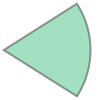

In [ ]:
polygon

In [ ]:
def polygon_to_geohash8(polygon, precision=8, step_m=50):
    """Fill the polygon with geohash8 tiles spaced roughly step_m apart."""
    minx, miny, maxx, maxy = polygon.bounds

    # Create grid points inside bounding box
    lats = np.arange(miny, maxy, step_m / 111320)  # 1 deg ≈ 111.32 km
    lons = np.arange(minx, maxx, step_m / (111320 * math.cos(math.radians((miny+maxy)/2))))

    geohashes = set()
    for lat in lats:
        for lon in lons:
            p = Point(lon, lat)
            if polygon.contains(p):
                geohashes.add(geohash2.encode(lat, lon, precision))

    return list(geohashes)

In [ ]:
ghs = polygon_to_geohash8(polygon)

In [ ]:
cell_site_df.head()

,Cell_ID,Site_ID,Site_Latitude,Site_Longitude,azimuth,tilt,antenna_height,EARFCN_DL,Sector_Count,Sector_Label
0,Cell_0,S011,6.933,79.850,226.349241,3.542993,29.019547,525,3,Sector_1
1,Cell_1,S011,6.933,79.850,346.349241,4.442829,44.037061,3750,3,Sector_2
2,Cell_2,S011,6.933,79.850,106.349241,6.727382,26.621105,525,3,Sector_3
3,Cell_3,S012,6.865,79.902,356.070907,0.724952,28.943616,3750,3,Sector_1
4,Cell_4,S012,6.865,79.902,116.070907,7.555032,28.386390,1650,3,Sector_2


In [ ]:
geo_rows = []

In [ ]:
for _, row in cell_site_df.iterrows():
    site_lat = row['Site_Latitude']
    site_lon = row['Site_Longitude']
    azimuth = row['azimuth']
    tilt = row['tilt']
    h = row['antenna_height']
    cell_id = row['Cell_ID']
    earfcn = row['EARFCN_DL']
    r_max = max_range(earfcn, h)
    poly = create_sector_polygon(site_lat, site_lon, azimuth, r_max)
    geohashes = polygon_to_geohash8(poly)

    for gh in geohashes:
        geo_rows.append({
            'geohash8': gh,
            'Cell_ID': cell_id,
            'Site_Latitude': site_lat,
            'Site_Longitude': site_lon,
            'azimuth': azimuth,
            'tilt': tilt,
            'antenna_height': h,
            'EARFCN_DL': earfcn
        })

In [ ]:
len(geo_rows)

505903

In [ ]:
df = pd.DataFrame(geo_rows)

In [ ]:
df.head()

,geohash8,Cell_ID,Site_Latitude,Site_Longitude,azimuth,tilt,antenna_height,EARFCN_DL
0,tc0z0x15,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525
1,tc0z26h7,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525
2,tc0z2k3t,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525
3,tc0z27d8,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525
4,tc0z26tb,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525


In [ ]:
df.shape

(505903, 8)

In [ ]:
df = df.rename(columns={'geohash8': 'Geohash'})
df.head()

,Geohash,Cell_ID,Site_Latitude,Site_Longitude,azimuth,tilt,antenna_height,EARFCN_DL
0,tc0z0x15,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525
1,tc0z26h7,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525
2,tc0z2k3t,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525
3,tc0z27d8,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525
4,tc0z26tb,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525


In [ ]:
!pip install rasterio

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import geohash2
import rasterio
from rasterio.transform import rowcol
from scipy.spatial import cKDTree
from tqdm import tqdm

def enrich_with_environmental_features(prediction_df,
                                       building_data_file,
                                       road_data_file,
                                       elevation_raster_file,
                                       ndvi_files,
                                       population_file):
    """
    Enrich prediction_df with building_count, total_road_length,
    elevation, NDVI, and population_density features.

    Args:
        prediction_df (pd.DataFrame): must contain 'Geohash'
        building_data_file (str): path to OSM buildings shapefile
        road_data_file (str): path to OSM roads shapefile
        elevation_raster_file (str): path to elevation .tif
        ndvi_files (list): list of NDVI raster .tif files
        population_file (str): path to population density CSV

    Returns:
        pd.DataFrame: enriched prediction_df
    """
    tqdm.pandas()

    # --- Buildings ---
    building_data = gpd.read_file(building_data_file).to_crs("EPSG:4326")
    building_data["Centroid"] = building_data.geometry.centroid
    building_data['Geohash'] = building_data["Centroid"].progress_apply(
        lambda pt: geohash2.encode(pt.y, pt.x, precision=8))
    building_counts = building_data.groupby('Geohash').size().reset_index(name='building_count')
    prediction_df = prediction_df.merge(building_counts, on='Geohash', how='left')
    prediction_df['building_count'] = prediction_df['building_count'].fillna(0).astype(int)

    # --- Roads ---
    road_data = gpd.read_file(road_data_file)
    road_data = road_data.set_crs("EPSG:4326", allow_override=True).to_crs("EPSG:5234")
    road_data['length_m'] = road_data.geometry.length
    road_data['centroid'] = road_data.geometry.centroid
    centroids_geo = gpd.GeoSeries(road_data["centroid"], crs="EPSG:5234").to_crs("EPSG:4326")
    road_data["Geohash"] = centroids_geo.apply(lambda pt: geohash2.encode(pt.y, pt.x, precision=8))
    road_grouped = road_data.groupby("Geohash").agg(total_road_length=("length_m", "sum")).reset_index()
    prediction_df = prediction_df.merge(road_grouped, on="Geohash", how="left")
    prediction_df['total_road_length'] = prediction_df['total_road_length'].fillna(0).astype(int)

    # --- Elevation ---
    def geohash_to_latlon_center(gh):
        lat, lon, _, _ = geohash2.decode_exactly(gh)
        return lat, lon
    prediction_df['lat'], prediction_df['lon'] = zip(*prediction_df['Geohash'].map(geohash_to_latlon_center))

    def get_raster_value(raster, lon, lat):
        try:
            coords = [(lon, lat)]
            for val in raster.sample(coords):
                return val[0] if val[0] != raster.nodata else np.nan
        except:
            return np.nan

    with rasterio.open(elevation_raster_file) as elev_src:
        prediction_df['elevation'] = prediction_df.progress_apply(
            lambda row: get_raster_value(elev_src, row['lon'], row['lat']), axis=1
        )

    # --- NDVI ---
    rasters = []
    for file in ndvi_files:
        src = rasterio.open(file)
        data = src.read(1).astype(np.float32) / 65535.0
        rasters.append((src, data))

    def get_ndvi(lat, lon):
        for src, ndvi_data in rasters:
            try:
                row, col = rowcol(src.transform, lon, lat)
                if (0 <= row < ndvi_data.shape[0]) and (0 <= col < ndvi_data.shape[1]):
                    return float(ndvi_data[row, col])
            except:
                continue
        return np.nan

    prediction_df["NDVI"] = prediction_df.progress_apply(
        lambda row: get_ndvi(row["lat"], row["lon"]), axis=1
    )

    # --- Population density ---
    df_pop = pd.read_csv(population_file)
    gdf = gpd.GeoDataFrame(prediction_df,
                           geometry=gpd.points_from_xy(prediction_df.lon, prediction_df.lat),
                           crs="EPSG:4326").to_crs("EPSG:5234")
    gdf_pop = gpd.GeoDataFrame(df_pop,
                               geometry=gpd.points_from_xy(df_pop.X, df_pop.Y),
                               crs="EPSG:4326").to_crs("EPSG:5234")
    points = np.array(list(zip(gdf.geometry.x, gdf.geometry.y)))
    pop_points = np.array(list(zip(gdf_pop.geometry.x, gdf_pop.geometry.y)))
    population_tree = cKDTree(pop_points)
    distances, indices = population_tree.query(points, distance_upper_bound=1000)

    prediction_df['population_density'] = [gdf_pop.iloc[i]['Z'] if i < len(gdf_pop) else 0
                                           for i in tqdm(indices)]

    # --- Cleanup ---
    return prediction_df.drop(columns=['lat', 'lon'], errors='ignore')

In [ ]:
df = enrich_with_environmental_features(
    df,
    building_data_file="/content/drive/MyDrive/Final_year_project/building/gis_osm_buildings_a_free_1.shp",
    road_data_file="/content/drive/MyDrive/Final_year_project/roads/gis_osm_roads_free_1.shp",
    elevation_raster_file="/content/drive/MyDrive/Final_year_project/terrain/elevation.tif",
    ndvi_files=[
        "/content/drive/MyDrive/Final_year_project/vegetation/ndvi_west.tiff",
        "/content/drive/MyDrive/Final_year_project/vegetation/ndvi_east.tiff"
    ],
    population_file="/content/drive/MyDrive/Final_year_project/population/population_density.csv"
)

/tmp/ipython-input-2599364679.py:35: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_data["Centroid"] = building_data.geometry.centroid
100%|██████████| 505903/505903 [00:24<00:00, 20537.91it/s]


In [ ]:
df.head()

,Geohash,Cell_ID,Site_Latitude,Site_Longitude,azimuth,tilt,antenna_height,EARFCN_DL,building_count,total_road_length,elevation,NDVI,population_density
0,tc0z0x15,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0
1,tc0z26h7,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0
2,tc0z2k3t,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0
3,tc0z27d8,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.920012,0.0
4,tc0z26tb,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0


In [ ]:
df.shape

(505903, 13)

In [ ]:
sites_df.head()

,Site_ID,Site_Latitude,Site_Longitude,Category,Sector_Count
0,S011,6.933,79.850,Urban / Inner-City,3
1,S012,6.865,79.902,Urban / Inner-City,3
2,S013,7.002,79.950,Suburban / Town,3
3,S014,6.991,80.048,Suburban / Town,3
4,S015,7.083,80.010,Suburban / Town,3


In [ ]:
sites_df = sites_df.rename(columns={
    'Site_Latitude': 'Site_latitude',
    'Site_Longitude': 'Site_longitude'
})
sites_df.head()

,Site_ID,Site_latitude,Site_longitude,Category,Sector_Count
0,S011,6.933,79.850,Urban / Inner-City,3
1,S012,6.865,79.902,Urban / Inner-City,3
2,S013,7.002,79.950,Suburban / Town,3
3,S014,6.991,80.048,Suburban / Town,3
4,S015,7.083,80.010,Suburban / Town,3


In [ ]:
!pip install python-geohash

In [ ]:
df.head()

,Geohash,Cell_ID,Site_Latitude,Site_Longitude,azimuth,tilt,antenna_height,EARFCN_DL,building_count,total_road_length,elevation,NDVI,population_density
0,tc0z0x15,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0
1,tc0z26h7,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0
2,tc0z2k3t,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0
3,tc0z27d8,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.920012,0.0
4,tc0z26tb,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0


In [ ]:
df.columns

Index(['Geohash', 'Cell_ID', 'Site_Latitude', 'Site_Longitude', 'azimuth',
       'tilt', 'antenna_height', 'EARFCN_DL', 'building_count',
       'total_road_length', 'elevation', 'NDVI', 'population_density'],
      dtype='object')

In [ ]:
df = df.rename(columns={
    'Site_Latitude': 'Site_latitude',
    'Site_Longitude': 'Site_longitude'
    })
df.head()

,Geohash,Cell_ID,Site_latitude,Site_longitude,azimuth,tilt,antenna_height,EARFCN_DL,building_count,total_road_length,elevation,NDVI,population_density
0,tc0z0x15,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0
1,tc0z26h7,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0
2,tc0z2k3t,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0
3,tc0z27d8,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.920012,0.0
4,tc0z26tb,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0


In [ ]:
def geohash_to_latlon_center(gh):
    lat, lon, _, _ = geohash2.decode_exactly(gh)
    return lat, lon

In [ ]:
df['lat'], df['lon'] = zip(*df['Geohash'].map(geohash_to_latlon_center))

In [ ]:
df.head()

,Geohash,Cell_ID,Site_latitude,Site_longitude,azimuth,tilt,antenna_height,EARFCN_DL,building_count,total_road_length,elevation,NDVI,population_density,lat,lon
0,tc0z0x15,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.894522,79.828205
1,tc0z26h7,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.911001,79.821682
2,tc0z2k3t,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.923704,79.817905
3,tc0z27d8,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.920012,0.0,6.918726,79.819279
4,tc0z26tb,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.913233,79.823742


In [ ]:
import numpy as np
import geopy.distance
import geohash
import pandas as pd
import math

def estimate_rsrp_rsrq(row):
    """
    Balanced RSRP/RSRQ estimator with realistic power ranges
    and controlled environmental effects.
    """

    # --- Frequency (MHz) ---
    f_mhz = 1805 + (row.get('EARFCN_DL', 1650) - 1200) * 0.1

    # --- Coordinates & distance (km) ---
    site_lat = row['Site_latitude']
    site_lon = row['Site_longitude']
    gh_lat, gh_lon = geohash.decode(row['Geohash'])
    dist_km = geopy.distance.geodesic((site_lat, site_lon), (gh_lat, gh_lon)).km + 0.001

    # --- Path loss model (COST-231-like) ---
    L_path = 32.44 + 20 * np.log10(np.maximum(dist_km, 0.01)) + 20 * np.log10(f_mhz) + np.random.uniform(30, 40)

    # --- Antenna parameters ---
    h_bs = row.get('antenna_height', 30.0)
    gain_height = 0.15 * (h_bs - 25.0)
    gain_tilt = -0.05 * abs(row.get('tilt', 5.0) - 5.0)

    # --- Bearing / Azimuth adjustment ---
    lat1, lon1 = map(math.radians, [site_lat, site_lon])
    lat2, lon2 = map(math.radians, [gh_lat, gh_lon])
    dlon = lon2 - lon1
    y = math.sin(dlon) * math.cos(lat2)
    x = math.cos(lat1)*math.sin(lat2) - math.sin(lat1)*math.cos(lat2)*math.cos(dlon)
    bearing = (math.degrees(math.atan2(y, x)) + 360) % 360

    az = float(row.get('azimuth', 0.0))
    az_diff = abs((az - bearing + 180) % 360 - 180)
    beam_gain = -6.0 * (az_diff / 65.0) ** 2
    beam_gain = np.clip(beam_gain, -18.0, 0.0)

    # --- Environmental modifiers ---
    bld_count = max(0, int(row.get('building_count', 0)))
    loss_building = -0.8 * np.log1p(bld_count)

    total_road_m = float(row.get('total_road_length', 0.0))
    gain_road = 0.0005 * (total_road_m / 100.0)

    elev = float(row.get('elevation', 20.0))
    gain_elev = 0.01 * (elev - 20.0)

    ndvi = float(row.get('NDVI', 0.0))
    loss_ndvi = -4.0 * ndvi

    pop = float(row.get('population_density', 0.0))
    loss_pop = -0.002 * (pop / 1000.0)

    # --- Category/site bias ---
    category = str(row.get('Category', '')).lower()
    if "dense urban" in category or "hotspot" in category:
        cat_bias = +2.0
    elif "urban" in category or "inner-city" in category:
        cat_bias = +1.0
    elif "suburban" in category or "town" in category:
        cat_bias = +0.3
    else:
        cat_bias = 0.0

    # --- Near-field boost ---
    if dist_km <= 0.05:
        near_boost = 4.0
    elif dist_km <= 0.2:
        near_boost = 2.0
    else:
        near_boost = 0.0

    # --- City proximity boost ---
    urban_centers = [
        (6.9271, 79.8612), (7.2906, 80.6337), (6.0535, 80.2210), (6.9497, 80.7891),
        (7.2083, 79.8358), (9.6615, 80.0255), (8.5887, 81.2152), (7.4863, 80.3623)
    ]
    dists_to_cities = [geopy.distance.geodesic((site_lat, site_lon), c).km for c in urban_centers]
    min_city_dist = min(dists_to_cities)
    city_boost = max(0.0, 3.0 * np.exp(-min_city_dist / 15.0))

    # --- Shadowing and fading ---
    shadowing = np.random.normal(0.0, 3.0)
    fading = np.random.normal(0.0, 1.0)

    # --- Transmit power baseline ---
    tx_power = 55.0
    factors = {
        'beam_gain': beam_gain,
        'gain_height': gain_height,
        'gain_tilt': gain_tilt,
        'loss_building': loss_building,
        'gain_road': gain_road,
        'gain_elev': gain_elev,
        'loss_ndvi': loss_ndvi,
        'loss_pop': loss_pop,
        'cat_bias': cat_bias,
        'near_boost': near_boost,
        'city_boost': city_boost,
        'shadowing': shadowing,
        'fading': fading
    }
    factor_keys = list(factors.keys())
    n_factors = np.random.randint(int(0.7 * len(factor_keys)), len(factor_keys) + 1)
    selected_keys = np.random.choice(factor_keys, n_factors, replace=False)
    selected_sum = sum(factors[k] for k in selected_keys)
    rsrp = tx_power - L_path + selected_sum

    # --- Final clipping ---
    rsrp = np.clip(rsrp, -115.0, -45.0)

    # --- RSRQ estimation ---
    rsrq = -14.0 + 0.05 * (rsrp + 90.0) + np.random.normal(0.0, 1.0)
    rsrq = np.clip(rsrq, -22.0, -6.0)

    return pd.Series({'RSRP': float(rsrp), 'RSRQ': float(rsrq)})

In [ ]:
tqdm.pandas()
df[['RSRP', 'RSRQ']] = df.progress_apply(estimate_rsrp_rsrq, axis=1)

100%|██████████| 505903/505903 [16:40<00:00, 505.72it/s]


In [ ]:
df.head()

,Geohash,Cell_ID,Site_latitude,Site_longitude,azimuth,tilt,antenna_height,EARFCN_DL,building_count,total_road_length,elevation,NDVI,population_density,lat,lon,RSRP,RSRQ
0,tc0z0x15,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.894522,79.828205,-96.188946,-13.793084
1,tc0z26h7,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.911001,79.821682,-89.998294,-14.818511
2,tc0z2k3t,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.923704,79.817905,-87.784755,-15.637794
3,tc0z27d8,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.920012,0.0,6.918726,79.819279,-98.398861,-14.729596
4,tc0z26tb,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.913233,79.823742,-86.211095,-13.889301


In [ ]:
df = df.merge(
    sites_df[['Site_ID', 'Site_latitude', 'Site_longitude']],
    on=['Site_latitude', 'Site_longitude'],
    how='left'
)
df.head()

,Geohash,Cell_ID,Site_latitude,Site_longitude,azimuth,tilt,antenna_height,EARFCN_DL,building_count,total_road_length,elevation,NDVI,population_density,lat,lon,RSRP,RSRQ,Site_ID
0,tc0z0x15,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.894522,79.828205,-96.188946,-13.793084,S011
1,tc0z26h7,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.911001,79.821682,-89.998294,-14.818511,S011
2,tc0z2k3t,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.923704,79.817905,-87.784755,-15.637794,S011
3,tc0z27d8,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.920012,0.0,6.918726,79.819279,-98.398861,-14.729596,S011
4,tc0z26tb,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.913233,79.823742,-86.211095,-13.889301,S011


In [ ]:
import math
import numpy as np
import geohash
import geopy.distance
import pandas as pd

def bearing(lat1, lon1, lat2, lon2):
    """Return bearing in degrees from point1 -> point2."""
    dlon = math.radians(lon2 - lon1)
    y = math.sin(dlon) * math.cos(math.radians(lat2))
    x = (math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) -
         math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(dlon))
    brng = math.degrees(math.atan2(y, x))
    return (brng + 360) % 360

def haversine_km(a, b):
    """Distance in km between two (lat,lon) tuples using geopy for reliability."""
    return geopy.distance.geodesic((a[0], a[1]), (b[0], b[1])).km

# You already had a max_range function earlier. If not, define a small stub:
def max_range(earfcn_dl, antenna_height):
    if earfcn_dl == 525:
        base_range = 5000
    elif earfcn_dl == 1650:
        base_range = 3000
    else:
        base_range = 1500
    return base_range + (antenna_height * 10)  # meters

def filter_wedge_corners(df,
                         beamwidth=65.0,
                         corner_margin_deg=8.0,
                         corner_inner_frac=0.6,
                         use_max_range=True):
    """
    Remove corner geohash cells from wedge tips while keeping origin and central wedge.
    Parameters:
      - df: DataFrame with columns
            ['Geohash','Cell_ID','Site_latitude','Site_longitude','azimuth',
             'tilt','antenna_height','EARFCN_DL', ...]
      - beamwidth: total beamwidth of wedge in degrees (default 65)
      - corner_margin_deg: angular band width near each edge considered 'corner' (deg)
      - corner_inner_frac: radial fraction (0..1). nodes with r_norm <= this are preserved
      - use_max_range: if True use max_range(EARFCN_DL, antenna_height) per row
    Returns:
      filtered_df containing rows kept (corners removed)
    """
    half_bw = beamwidth / 2.0
    keep_rows = []

    # We'll iterate rows; for large data you can vectorize/group by cell.
    for _, row in df.iterrows():
        # site coords and geohash center
        site_lat = row['Site_latitude']
        site_lon = row['Site_longitude']
        az = float(row['azimuth'])

        try:
            gh_lat, gh_lon = geohash.decode(row['Geohash'])
        except Exception:
            # skip malformed geohash
            continue

        # distance in meters
        dist_km = geopy.distance.geodesic((site_lat, site_lon), (gh_lat, gh_lon)).km
        dist_m = dist_km * 1000.0

        # compute max range for normalization (meters)
        if use_max_range:
            r_max_m = max_range(row['EARFCN_DL'], row['antenna_height'])
            # ensure non-zero
            if r_max_m <= 0:
                r_max_m = 1500.0
        else:
            r_max_m = 1500.0

        r_norm = min(1.0, dist_m / r_max_m)  # normalized radial position in [0,1]

        # compute bearing and angular difference (shortest)
        brng = bearing(site_lat, site_lon, gh_lat, gh_lon)
        diff = abs(((brng - az + 180) % 360) - 180)  # shortest difference [0,180]

        # If point is well inside central wedge (not in corner band) => keep
        if diff <= (half_bw - corner_margin_deg):
            keep_rows.append(row)
            continue

        # If point is near or outside wedge entirely => discard
        if diff > half_bw:
            # completely outside wedge angle
            continue

        # Now point is within the corner angular band:
        # define a linear ramp that defines maximum allowed r_norm depending on how close to edge
        # when diff == (half_bw - corner_margin_deg) -> allowed_frac = 1.0 (fully allowed)
        # when diff == half_bw -> allowed_frac = corner_inner_frac (only inner fraction allowed)
        angle_from_band_start = diff - (half_bw - corner_margin_deg)  # in [0, corner_margin_deg]
        if corner_margin_deg <= 0:
            allowed_frac = corner_inner_frac
        else:
            # linear interpolation
            allowed_frac = 1.0 - ( (1.0 - corner_inner_frac) * (angle_from_band_start / corner_margin_deg) )

        # keep only if r_norm is within allowed_frac
        if r_norm <= allowed_frac:
            keep_rows.append(row)
        else:
            # removed as corner tile
            continue

    # return DataFrame of kept rows
    if len(keep_rows) == 0:
        return pd.DataFrame(columns=df.columns)  # empty DF but same structure
    filtered_df = pd.DataFrame(keep_rows).reset_index(drop=True)
    return filtered_df

In [ ]:
filtered_df = filter_wedge_corners(
    df,
    beamwidth=65,
    corner_margin_deg=10,
    corner_inner_frac=0.9
)
filtered_df.shape

(490131, 18)

In [ ]:
filtered_df.head()

,Geohash,Cell_ID,Site_latitude,Site_longitude,azimuth,tilt,antenna_height,EARFCN_DL,building_count,total_road_length,elevation,NDVI,population_density,lat,lon,RSRP,RSRQ,Site_ID
0,tc0z0x15,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.894522,79.828205,-96.188946,-13.793084,S011
1,tc0z26h7,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.911001,79.821682,-89.998294,-14.818511,S011
2,tc0z2k3t,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.923704,79.817905,-87.784755,-15.637794,S011
3,tc0z27d8,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.920012,0.0,6.918726,79.819279,-98.398861,-14.729596,S011
4,tc0z26tb,Cell_0,6.933,79.85,226.349241,3.542993,29.019547,525,0,0,0.0,0.860014,0.0,6.913233,79.823742,-86.211095,-13.889301,S011


In [ ]:
import pandas as pd
import folium
import geohash
import geohash2

# --- Select the site of interest ---
site_id = str(input("Enter the site ID: "))   # <-- change this to the Site_ID you want
site_df = filtered_df[filtered_df['Site_ID'] == site_id].copy()

# Extract all cells belonging to that site
site_cells = site_df['Cell_ID'].unique()
print(f"Plotting {len(site_cells)} cells for site {site_id}")

# Use precision 8 for geohash aggregation
site_df['geohash8'] = site_df['Geohash'].str[:8]

# --- Aggregate average RSRP for each geohash ---
agg_data = []
for gh, group in site_df.groupby('geohash8'):
    lat, lon = geohash.decode(gh)
    avg_rsrp = group['RSRP'].mean()
    count = len(group)
    cell_ids = group['Cell_ID'].unique().tolist()
    agg_data.append((gh, lat, lon, avg_rsrp, count, cell_ids))

agg_df = pd.DataFrame(agg_data, columns=['geohash8', 'avg_lat', 'avg_lon', 'avg_RSRP', 'point_count', 'Cell_IDs'])

# --- Color mapping for RSRP ---
def rsrp_to_color(rsrp):
    if rsrp == 0 or pd.isna(rsrp):
        return "#606060"  # gray
    elif rsrp <= -85:
        return "red"
    elif rsrp <= -75:
        return "orange"
    elif rsrp <= -65:
        return "yellow"
    else:
        return "green"

# --- Initialize map centered on site ---
center_lat = site_df['Site_latitude'].mean()
center_lon = site_df['Site_longitude'].mean()
m_site = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# --- Draw rectangles for all geohash cells ---
for _, row in agg_df.iterrows():
    bbox = geohash2.decode_exactly(row['geohash8'])
    lat, lon, lat_err, lon_err = bbox
    lat_min, lat_max = lat - lat_err, lat + lat_err
    lon_min, lon_max = lon - lon_err, lon + lon_err

    color = rsrp_to_color(row['avg_RSRP'])
    cell_list = ", ".join(map(str, row['Cell_IDs']))
    popup_text = (
        f"<b>Site:</b> {site_id}<br>"
        f"<b>Cells:</b> {cell_list}<br>"
        f"Points: {row['point_count']}<br>"
        f"Avg RSRP: {row['avg_RSRP']:.2f} dBm"
    )

    folium.Rectangle(
        bounds=[[lat_min, lon_min], [lat_max, lon_max]],
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=popup_text
    ).add_to(m_site)

# --- Plot site marker ---
site_lat = site_df['Site_latitude'].iloc[0]
site_lon = site_df['Site_longitude'].iloc[0]
folium.Marker(
    location=[site_lat, site_lon],
    icon=folium.Icon(color='black', icon='signal', prefix='fa'),
    popup=f"Site ID: {site_id}"
).add_to(m_site)

# --- Title ---
title_html = f'''
<div style="
    position: fixed;
    top: 10px;
    left: 50%;
    transform: translateX(-50%);
    z-index: 9999;
    font-size: 22px;
    font-weight: bold;
    background-color: white;
    padding: 5px 10px;
    border: 2px solid grey;
    border-radius: 5px;
    box-shadow: 2px 2px 5px rgba(0,0,0,0.3);
">
RSRP Distribution Map — Site {site_id}
</div>
'''
m_site.get_root().html.add_child(folium.Element(title_html))

# --- Legend ---
legend_html = '''
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 200px; height: 160px;
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white;
            padding:5px;">
<b>RSRP (dBm)</b><br>
<i style="background:red;color:red">....</i>&nbsp; ≤ -85 (Very Weak)<br>
<i style="background:orange;color:orange">....</i>&nbsp; -85 to -75 (Weak–Medium)<br>
<i style="background:yellow;color:yellow">....</i>&nbsp; -75 to -65 (Medium–Strong)<br>
<i style="background:green;color:green">....</i>&nbsp; > -65 (Very Strong)<br>
<i style="background:#606060;color:#606060">....</i>&nbsp; Zero/No Data
</div>
'''
m_site.get_root().html.add_child(folium.Element(legend_html))

m_site

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd
import folium
import geohash
import geohash2

# --- Select the site of interest ---
site_id = str(input("Enter the site ID: "))   # <-- enter the Site_ID you want to visualize
site_df = filtered_df[filtered_df['Site_ID'] == site_id].copy()

# Extract all cells belonging to that site
site_cells = site_df['Cell_ID'].unique()
print(f"Plotting {len(site_cells)} cells for site {site_id}")

# Use precision 8 for geohash aggregation
site_df['geohash8'] = site_df['Geohash'].str[:8]

# --- Aggregate average RSRQ for each geohash ---
agg_data = []
for gh, group in site_df.groupby('geohash8'):
    lat, lon = geohash.decode(gh)
    avg_rsrq = group['RSRQ'].mean()
    count = len(group)
    cell_ids = group['Cell_ID'].unique().tolist()
    agg_data.append((gh, lat, lon, avg_rsrq, count, cell_ids))

agg_df = pd.DataFrame(agg_data, columns=['geohash8', 'avg_lat', 'avg_lon', 'avg_RSRQ', 'point_count', 'Cell_IDs'])

# --- Color mapping for RSRQ ---
def rsrq_to_color(rsrq):
    if rsrq == 0 or pd.isna(rsrq):
        return "#606060"  # gray / no data
    elif rsrq <= -18:
        return "red"       # very poor
    elif rsrq <= -14:
        return "orange"    # poor–medium
    elif rsrq <= -10:
        return "yellow"    # medium–good
    else:
        return "green"     # excellent

# --- Initialize map centered on site ---
center_lat = site_df['Site_latitude'].mean()
center_lon = site_df['Site_longitude'].mean()
m_site = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# --- Draw rectangles for all geohash cells ---
for _, row in agg_df.iterrows():
    bbox = geohash2.decode_exactly(row['geohash8'])
    lat, lon, lat_err, lon_err = bbox
    lat_min, lat_max = lat - lat_err, lat + lat_err
    lon_min, lon_max = lon - lon_err, lon + lon_err

    color = rsrq_to_color(row['avg_RSRQ'])
    cell_list = ", ".join(map(str, row['Cell_IDs']))
    popup_text = (
        f"<b>Site:</b> {site_id}<br>"
        f"<b>Cells:</b> {cell_list}<br>"
        f"Points: {row['point_count']}<br>"
        f"Avg RSRQ: {row['avg_RSRQ']:.2f} dB"
    )

    folium.Rectangle(
        bounds=[[lat_min, lon_min], [lat_max, lon_max]],
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=popup_text
    ).add_to(m_site)

# --- Plot site marker ---
site_lat = site_df['Site_latitude'].iloc[0]
site_lon = site_df['Site_longitude'].iloc[0]
folium.Marker(
    location=[site_lat, site_lon],
    icon=folium.Icon(color='black', icon='signal', prefix='fa'),
    popup=f"Site ID: {site_id}"
).add_to(m_site)

# --- Title ---
title_html = f'''
<div style="
    position: fixed;
    top: 10px;
    left: 50%;
    transform: translateX(-50%);
    z-index: 9999;
    font-size: 22px;
    font-weight: bold;
    background-color: white;
    padding: 5px 10px;
    border: 2px solid grey;
    border-radius: 5px;
    box-shadow: 2px 2px 5px rgba(0,0,0,0.3);
">
RSRQ Distribution Map — Site {site_id}
</div>
'''
m_site.get_root().html.add_child(folium.Element(title_html))

# --- Legend ---
legend_html = '''
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 220px; height: 160px;
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white;
            padding:5px;">
<b>RSRQ (dB)</b><br>
<i style="background:red;color:red">....</i>&nbsp; ≤ -18 (Very Poor)<br>
<i style="background:orange;color:orange">....</i>&nbsp; -18 to -14 (Poor–Medium)<br>
<i style="background:yellow;color:yellow">....</i>&nbsp; -14 to -10 (Medium–Good)<br>
<i style="background:green;color:green">....</i>&nbsp; > -10 (Excellent)<br>
<i style="background:#606060;color:#606060">....</i>&nbsp; Zero/No Data
</div>
'''
m_site.get_root().html.add_child(folium.Element(legend_html))

m_site

Output hidden; open in https://colab.research.google.com to view.

In [195]:
filtered_df.to_csv('/content/drive/MyDrive/Final_year_project/datasets/cell_sites_v4.csv', index=False)